In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr, ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [5]:
OG = pd.read_csv("train_ZoGVYWq.csv")

In [8]:
OG.describe(include='all')

id  perc_premium_paid_by_cash_credit   age_in_days  \
count    79853.000000                      79853.000000  79853.000000   
unique            NaN                               NaN           NaN   
top               NaN                               NaN           NaN   
freq              NaN                               NaN           NaN   
mean     57167.166368                          0.314288  18846.696906   
std      32928.970160                          0.334915   5208.719136   
min          2.000000                          0.000000   7670.000000   
25%      28640.000000                          0.034000  14974.000000   
50%      57262.000000                          0.167000  18625.000000   
75%      85632.000000                          0.538000  22636.000000   
max     114076.000000                          1.000000  37602.000000   

              Income  Count_3-6_months_late  Count_6-12_months_late  \
count   7.985300e+04           79756.000000            79756.000000   
unique           NaN                    NaN                     NaN   
top              NaN                    NaN                     NaN   
freq             NaN                    NaN                     NaN   
mean    2.088472e+05               0.248671                0.078188   
std     4.965826e+05               0.691468                0.436507   
min     2.403000e+04               0.000000                0.000000   
25%     1.080100e+05               0.000000                0.000000   
50%     1.665600e+05               0.000000                0.000000   
75%     2.520900e+05               0.000000                0.000000   
max     9.026260e+07              13.000000               17.000000   

        Count_more_than_12_months_late  application_underwriting_score  \
count                     79756.000000                    76879.000000   
unique                             NaN                             NaN   
top                                NaN                             NaN   
freq                               NaN                             NaN   
mean                          0.060008                       99.067291   
std                           0.312023                        0.739799   
min                           0.000000                       91.900000   
25%                           0.000000                       98.810000   
50%                           0.000000                       99.210000   
75%                           0.000000                       99.540000   
max                          11.000000                       99.890000   

        no_of_premiums_paid sourcing_channel residence_area_type  \
count          79853.000000            79853               79853   
unique                  NaN                5                   2   
top                     NaN                A               Urban   
freq                    NaN            43134               48183   
mean              10.863887              NaN                 NaN   
std                5.170687              NaN                 NaN   
min                2.000000              NaN                 NaN   
25%                7.000000              NaN                 NaN   
50%               10.000000              NaN                 NaN   
75%               14.000000              NaN                 NaN   
max               60.000000              NaN                 NaN   

             premium       renewal  
count   79853.000000  79853.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    10924.507533      0.937410  
std      9401.676542      0.242226  
min      1200.000000      0.000000  
25%      5400.000000      1.000000  
50%      7500.000000      1.000000  
75%     13800.000000      1.000000  
max     60000.000000      1.000000

In [10]:
OG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  rene

In [12]:
# Show duplicate records
OG[OG.duplicated()]


Empty DataFrame
Columns: [id, perc_premium_paid_by_cash_credit, age_in_days, Income, Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, sourcing_channel, residence_area_type, premium, renewal]
Index: []

In [14]:
OG[OG.duplicated(subset=['perc_premium_paid_by_cash_credit', 
                      'age_in_days', 
                      'Income', 
                      'Count_3-6_months_late', 
                      'Count_6-12_months_late',
                      'Count_more_than_12_months_late',
                      'application_underwriting_score',
                      'no_of_premiums_paid',
                      'sourcing_channel',
                      'residence_area_type',
                      'premium',
                      'renewal'])]

Empty DataFrame
Columns: [id, perc_premium_paid_by_cash_credit, age_in_days, Income, Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, sourcing_channel, residence_area_type, premium, renewal]
Index: []

In [16]:
OG.shape

(79853, 13)

In [18]:
OG.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [20]:
missing_cols = OG.columns[OG.isnull().any()].tolist()
missing_cols

['Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score']

In [22]:
all_missing_records = OG[OG[missing_cols].isnull().all(axis=1)]
print("Rows where ALL missing columns are NaN:", len(all_missing_records))

Rows where ALL missing columns are NaN: 73


In [24]:
OG['Count_3-6_months_late'].value_counts(dropna=False)

Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
NaN        97
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: count, dtype: int64

In [26]:
OG['Count_6-12_months_late'].value_counts(dropna=False)

Count_6-12_months_late
0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
NaN        97
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: count, dtype: int64

In [28]:
OG['Count_more_than_12_months_late'].value_counts(dropna=False)

Count_more_than_12_months_late
0.0     76038
1.0      2996
2.0       498
3.0       151
NaN        97
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: count, dtype: int64

In [30]:
OG['application_underwriting_score'].value_counts(dropna=False)

application_underwriting_score
NaN      2974
99.89    1972
99.88    1343
99.87     856
99.86     693
         ... 
94.07       1
92.71       1
92.50       1
92.85       1
93.57       1
Name: count, Length: 673, dtype: int64

In [32]:
# Create a copy of OG for processing
OG_proc = OG.copy()

# Convert age from days to years (integer)
OG_proc['age_in_years'] = (OG_proc['age_in_days'] / 365).astype(int)
# Drop the original age_in_days column
OG_proc = OG_proc.drop(columns=['age_in_days'])
# Drop the ID column from OG_proc
OG_proc = OG_proc.drop(columns=['id'])


In [34]:
OG_proc.shape

(79853, 12)

In [36]:
OG_proc_outlier_handled = OG_proc.copy()

In [38]:
OG_proc_outlier_handled.describe()

perc_premium_paid_by_cash_credit        Income  Count_3-6_months_late  \
count                      79853.000000  7.985300e+04           79756.000000   
mean                           0.314288  2.088472e+05               0.248671   
std                            0.334915  4.965826e+05               0.691468   
min                            0.000000  2.403000e+04               0.000000   
25%                            0.034000  1.080100e+05               0.000000   
50%                            0.167000  1.665600e+05               0.000000   
75%                            0.538000  2.520900e+05               0.000000   
max                            1.000000  9.026260e+07              13.000000   

       Count_6-12_months_late  Count_more_than_12_months_late  \
count            79756.000000                    79756.000000   
mean                 0.078188                        0.060008   
std                  0.436507                        0.312023   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 17.000000                       11.000000   

       application_underwriting_score  no_of_premiums_paid       premium  \
count                    76879.000000         79853.000000  79853.000000   
mean                        99.067291            10.863887  10924.507533   
std                          0.739799             5.170687   9401.676542   
min                         91.900000             2.000000   1200.000000   
25%                         98.810000             7.000000   5400.000000   
50%                         99.210000            10.000000   7500.000000   
75%                         99.540000            14.000000  13800.000000   
max                         99.890000            60.000000  60000.000000   

            renewal  age_in_years  
count  79853.000000  79853.000000  
mean       0.937410     51.607404  
std        0.242226     14.270484  
min        0.000000     21.000000  
25%        1.000000     41.000000  
50%        1.000000     51.000000  
75%        1.000000     62.000000  
max        1.000000    103.000000

In [40]:
# Define target
target_col = 'renewal'

# Extract categorical & numerical columns from OG_proc
cat_cols = OG_proc.select_dtypes(include=['object']).columns.tolist()
num_cols = OG_proc.select_dtypes(include=['int64', 'float64']).columns.drop(target_col).tolist()


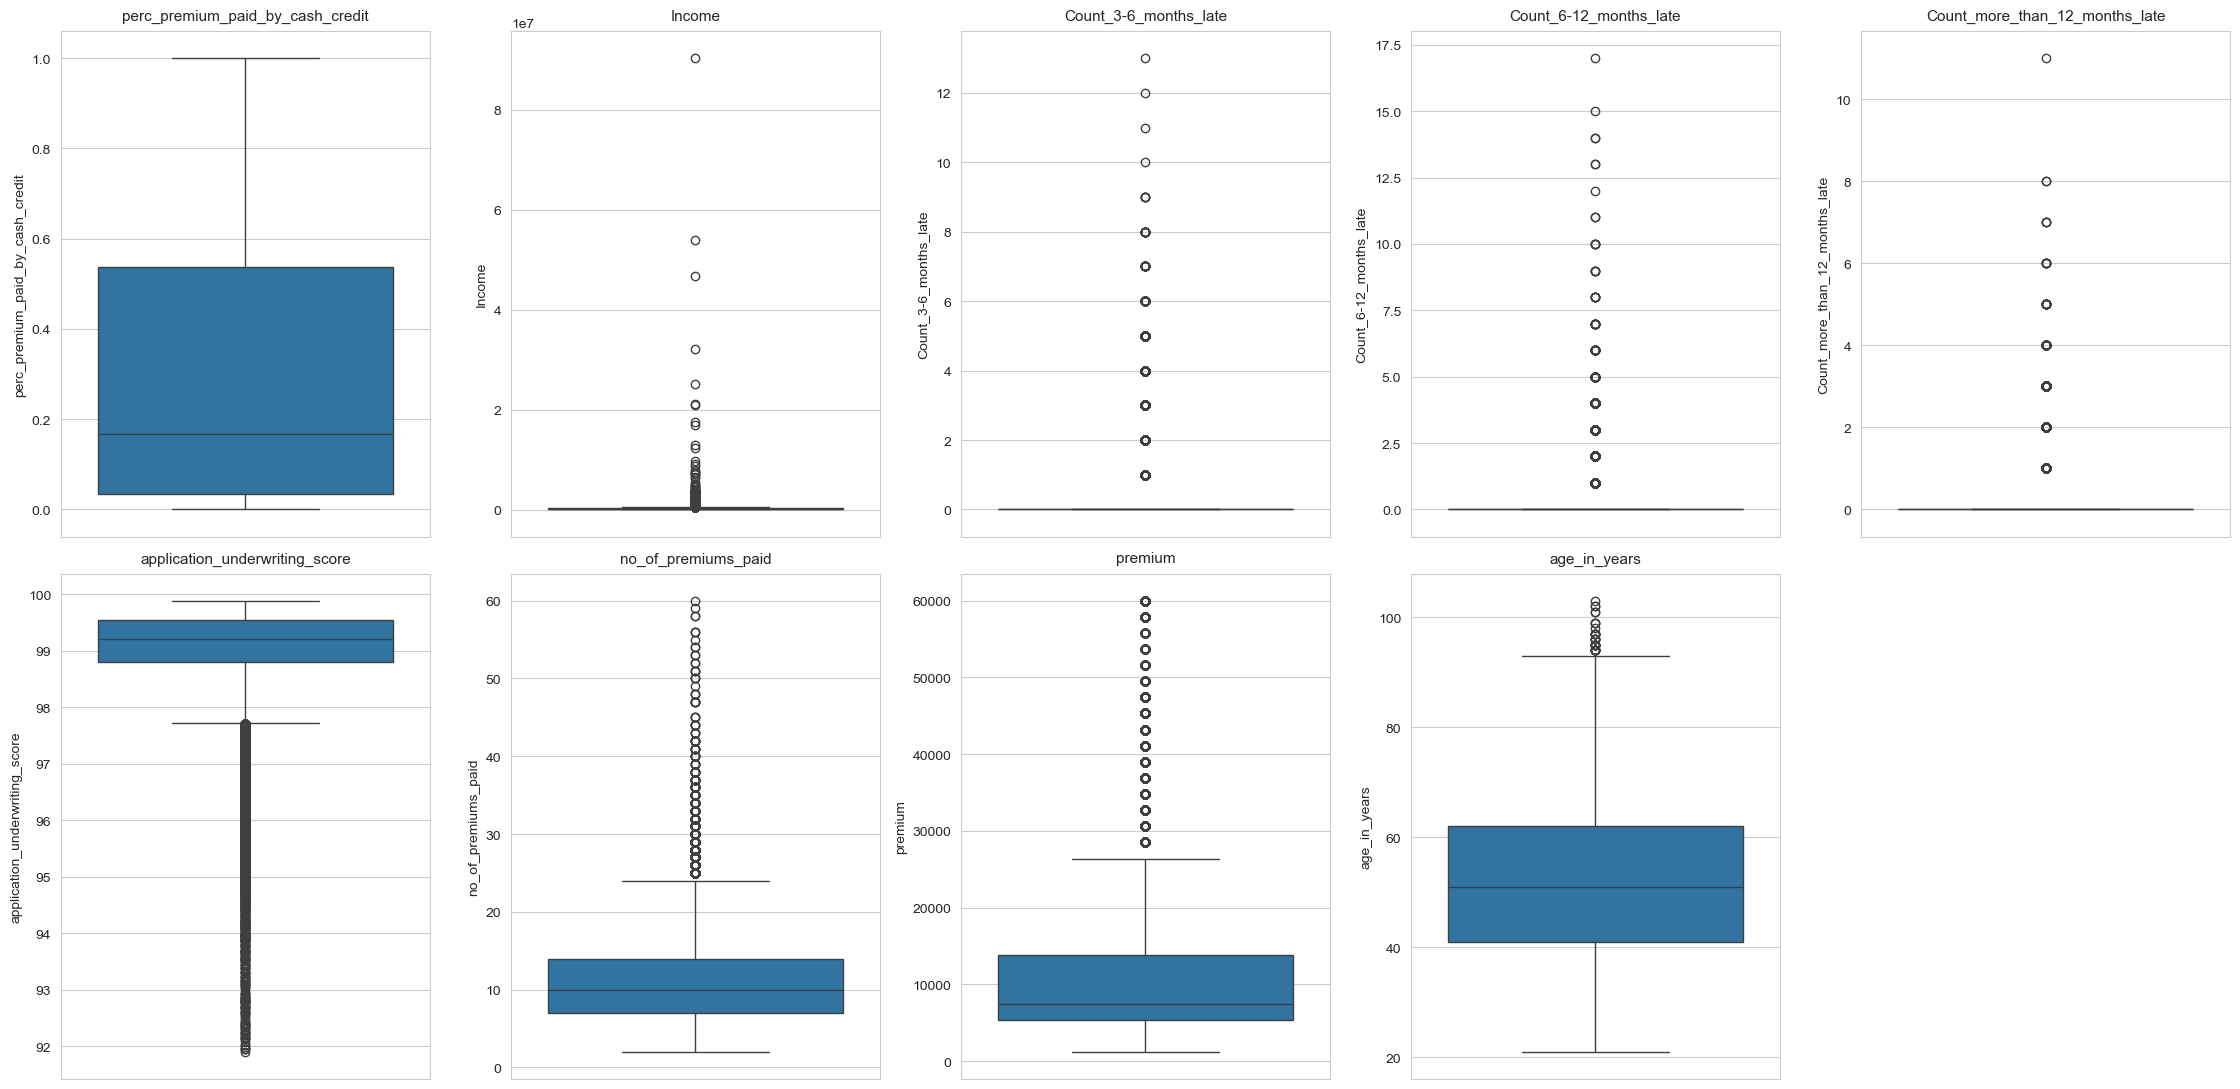

Saved figure to: boxplots_vertical_9_features.png


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------- Settings ----------
sns.set_style("whitegrid")
OG_proc = OG_proc  # your dataframe
num_cols = num_cols  # list of 9 numeric column names

# Layout choices suitable for 9 features:
max_cols_per_row = 5   # 5 per row => for 9 features you'll get 2 rows (5 + 4)
n_plots = len(num_cols)
ncols = min(n_plots, max_cols_per_row)
nrows = int(np.ceil(n_plots / ncols))

# Figure sizing (adjust multipliers if you want larger plots)
fig_w = 4.5 * ncols   # width per subplot (in inches)
fig_h = 5.5 * nrows   # height per subplot (in inches)
fig, axes = plt.subplots(nrows, ncols, figsize=(fig_w, fig_h), squeeze=False)

# ---------- Plot loop ----------
for idx, col in enumerate(num_cols):
    r = idx // ncols
    c = idx % ncols
    ax = axes[r, c]

    # Vertical boxplot
    sns.boxplot(y=OG_proc[col], orient='v', ax=ax)

    # Title and formatting
    ax.set_title(col, fontsize=11, pad=8)
    ax.tick_params(axis='x', which='major', labelrotation=30)

    # Set separate y-limits per subplot with slight padding
    data = OG_proc[col].dropna()
    if not data.empty:
        mn, mx = data.min(), data.max()
        rng = mx - mn
        if rng == 0:
            ax.set_ylim(mn - 1, mx + 1)
        else:
            pad = 0.06 * rng
            ax.set_ylim(mn - pad, mx + pad)
    else:
        ax.set_ylim(-1, 1)

# Hide unused axes (if any)
total_axes = nrows * ncols
for j in range(n_plots, total_axes):
    r = j // ncols
    c = j % ncols
    axes[r, c].set_visible(False)

plt.tight_layout()

# Save high-res image
out_path = "boxplots_vertical_9_features.png"
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved figure to: {out_path}")


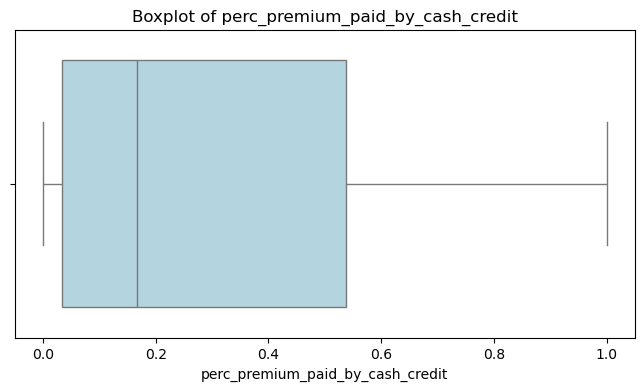

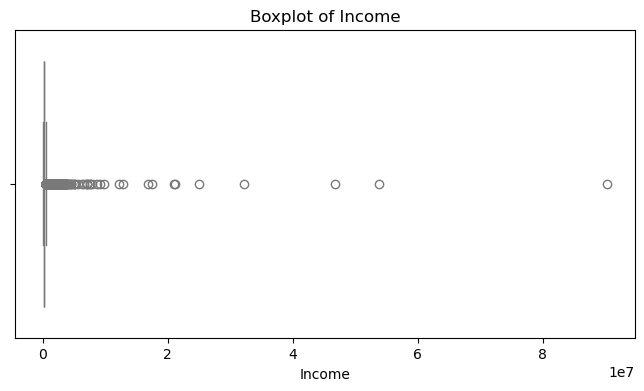

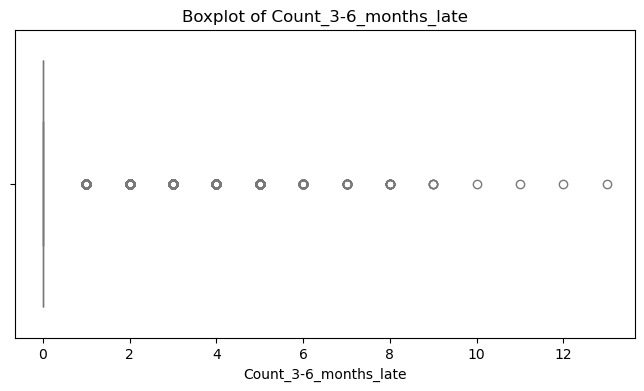

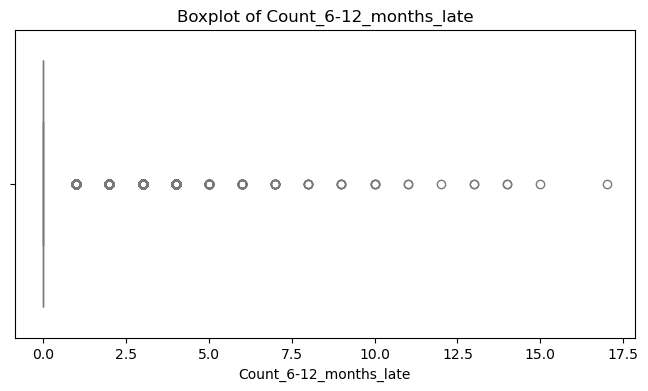

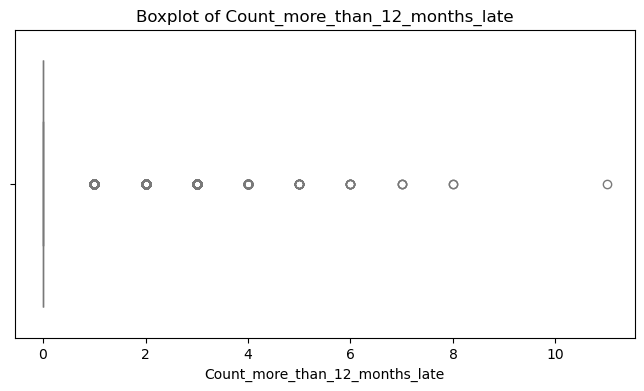

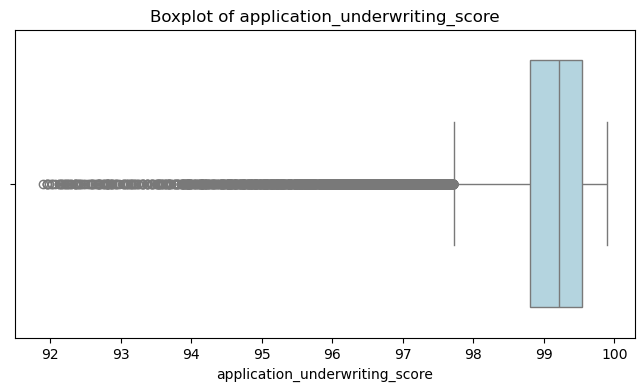

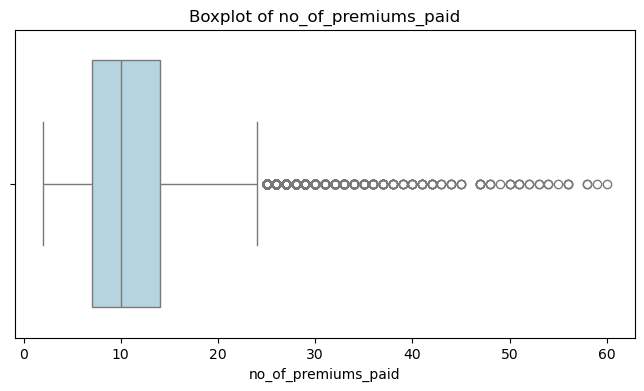

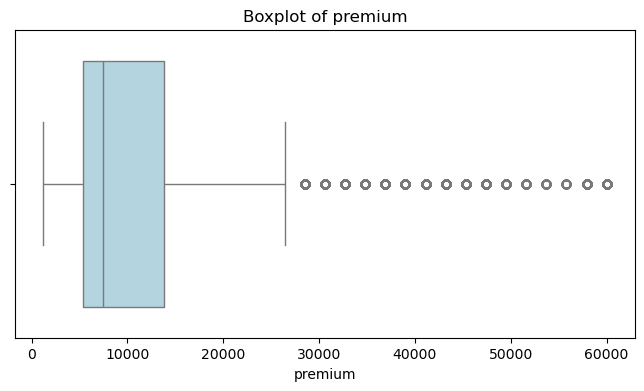

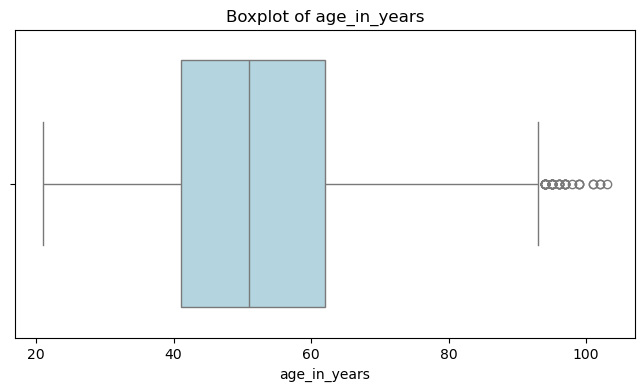

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=OG_proc[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [359]:
outliers_dict = {}

for col in num_cols:
    Q1 = OG_proc[col].quantile(0.25)
    Q3 = OG_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Extract outlier rows
    outlier_rows = OG_proc.loc[
        (OG_proc[col] < lower) | (OG_proc[col] > upper), col
    ]
    
    # Store info
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "distinct_vals": np.sort(outlier_rows.unique()),
        "num_distinct": outlier_rows.nunique(),
        "num_outliers": outlier_rows.shape[0]
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n{col}:")
    print(f"  Lower Bound = {info['lower_bound']:.2f}, Upper Bound = {info['upper_bound']:.2f}")
    print(f"  Outliers → {info['num_outliers']} rows ({info['num_distinct']} distinct values)")
    print(f"  Example values: {info['distinct_vals'][:20]}")  # show first 20 if too many


perc_premium_paid_by_cash_credit:
  Lower Bound = -0.72, Upper Bound = 1.29
  Outliers → 0 rows (0 distinct values)
  Example values: []

Income:
  Lower Bound = -108110.00, Upper Bound = 468210.00
  Outliers → 3428 rows (2233 distinct values)
  Example values: [468280 468320 468520 468870 468920 469080 469140 469180 469240 469310
 469360 469550 469600 469620 469830 469840 469920 469990 470020 470040]

Count_3-6_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 12955 rows (13 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]

Count_6-12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3925 rows (16 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17.]

Count_more_than_12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3718 rows (9 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8. 11.]

application_underwriting_score:
  Lower Boun

In [361]:
outliers_dict = {}

for col in num_cols:
    Q1 = OG_proc[col].quantile(0.25)
    Q3 = OG_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Extract outlier rows
    outlier_rows = OG_proc.loc[
        (OG_proc[col] < lower) | (OG_proc[col] > upper), col
    ]
    
    # Store info
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "distinct_vals": np.sort(outlier_rows.unique()),
        "num_distinct": outlier_rows.nunique(),
        "num_outliers": outlier_rows.shape[0]
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n{col}:")
    print(f"  Lower Bound = {info['lower_bound']:.2f}, Upper Bound = {info['upper_bound']:.2f}")
    print(f"  Outliers → {info['num_outliers']} rows ({info['num_distinct']} distinct values)")
    print(f"  Example values: {info['distinct_vals'][:20]}")  # show first 20 if too many


perc_premium_paid_by_cash_credit:
  Lower Bound = -0.72, Upper Bound = 1.29
  Outliers → 0 rows (0 distinct values)
  Example values: []

Income:
  Lower Bound = -108110.00, Upper Bound = 468210.00
  Outliers → 3428 rows (2233 distinct values)
  Example values: [468280 468320 468520 468870 468920 469080 469140 469180 469240 469310
 469360 469550 469600 469620 469830 469840 469920 469990 470020 470040]

Count_3-6_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 12955 rows (13 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]

Count_6-12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3925 rows (16 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17.]

Count_more_than_12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3718 rows (9 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8. 11.]

application_underwriting_score:
  Lower Boun

In [363]:
import numpy as np
import pandas as pd

# Assume OG_proc is your pre-processed DataFrame with all the features and the 'renewal' column.
# Let's define the list of numerical columns based on your provided output.
num_cols = [
    'perc_premium_paid_by_cash_credit',
    'Income',
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late',
    'application_underwriting_score',
    'no_of_premiums_paid',
    'premium',
    'age_in_years'
]

outliers_dict = {}

for col in num_cols:
    Q1 = OG_proc[col].quantile(0.25)
    Q3 = OG_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify the rows that are outliers and those that are not.
    outlier_mask = (OG_proc[col] < lower) | (OG_proc[col] > upper)
    non_outlier_mask = ~outlier_mask

    # Get the 'renewal' distribution for both groups.
    renewal_dist_outliers = OG_proc.loc[outlier_mask, 'renewal'].value_counts(normalize=True)
    renewal_dist_non_outliers = OG_proc.loc[non_outlier_mask, 'renewal'].value_counts(normalize=True)

    # Store all the information
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "num_outliers": outlier_mask.sum(),
        "renewal_dist_outliers": renewal_dist_outliers.to_dict(),
        "renewal_dist_non_outliers": renewal_dist_non_outliers.to_dict(),
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n===== Analysis for '{col}' =====")
    print(f"Number of outliers: {info['num_outliers']}")
    print("-" * 20)

    # Print renewal distribution for non-outliers
    print("Non-Outlier Data:")
    if 0 in info['renewal_dist_non_outliers']:
        print(f"  - % Non-renewal (0): {info['renewal_dist_non_outliers'][0]:.2%}")
    if 1 in info['renewal_dist_non_outliers']:
        print(f"  - % Renewal (1): {info['renewal_dist_non_outliers'][1]:.2%}")

    # Print renewal distribution for outliers
    print("\nOutlier Data:")
    # Handle cases where no outliers exist for a given class
    if 0 in info['renewal_dist_outliers']:
        print(f"  - % Non-renewal (0): {info['renewal_dist_outliers'][0]:.2%}")
    else:
        print("  - % Non-renewal (0): 0.00%")
    if 1 in info['renewal_dist_outliers']:
        print(f"  - % Renewal (1): {info['renewal_dist_outliers'][1]:.2%}")
    else:
        print("  - % Renewal (1): 0.00%")

    # Compare the two distributions and provide a conclusion
    print("\nImpact on Renewal:")
    if info['num_outliers'] > 0:
        # Check if a clear impact exists
        non_renewal_outliers = info['renewal_dist_outliers'].get(0, 0)
        non_renewal_non_outliers = info['renewal_dist_non_outliers'].get(0, 0)
        
        diff = non_renewal_outliers - non_renewal_non_outliers
        
        if abs(diff) > 0.05: # A 5% difference is a good heuristic
            if diff > 0:
                print(f"  - Outliers are **MORE** likely to be non-renewals (Class 0) by {abs(diff):.2%}. These outliers are likely **predictive** and should be preserved.")
            else:
                print(f"  - Outliers are **LESS** likely to be non-renewals (Class 0) by {abs(diff):.2%}. These outliers are also likely **informative** and should be preserved.")
        else:
            print("  - Outliers do NOT show a strong impact on renewal rates. They may be treated as noise and can be imputed or capped.")
    else:
        print("  - No outliers found for this feature to perform an analysis.")


===== Analysis for 'perc_premium_paid_by_cash_credit' =====
Number of outliers: 0
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 6.26%
  - % Renewal (1): 93.74%

Outlier Data:
  - % Non-renewal (0): 0.00%
  - % Renewal (1): 0.00%

Impact on Renewal:
  - No outliers found for this feature to perform an analysis.

===== Analysis for 'Income' =====
Number of outliers: 3428
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 6.33%
  - % Renewal (1): 93.67%

Outlier Data:
  - % Non-renewal (0): 4.78%
  - % Renewal (1): 95.22%

Impact on Renewal:
  - Outliers do NOT show a strong impact on renewal rates. They may be treated as noise and can be imputed or capped.

===== Analysis for 'Count_3-6_months_late' =====
Number of outliers: 12955
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 4.02%
  - % Renewal (1): 95.98%

Outlier Data:
  - % Non-renewal (0): 17.84%
  - % Renewal (1): 82.16%

Impact on Renewal:
  - Outliers are **MORE** likely to be non-renew

In [45]:

for col in num_cols:
    Q1 = OG_proc_outlier_handled[col].quantile(0.25)
    Q3 = OG_proc_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Mark outliers as NaN
    OG_proc_outlier_handled.loc[
        (OG_proc_outlier_handled[col] < lower) | 
        (OG_proc_outlier_handled[col] > upper), col
    ] = np.nan

print("NaNs introduced after outlier marking:\n", OG_proc_outlier_handled[num_cols].isna().sum())

NaNs introduced after outlier marking:
 perc_premium_paid_by_cash_credit        0
Income                               3428
Count_3-6_months_late               13052
Count_6-12_months_late               4022
Count_more_than_12_months_late       3815
application_underwriting_score       6355
no_of_premiums_paid                  1426
premium                              4523
age_in_years                           44
dtype: int64


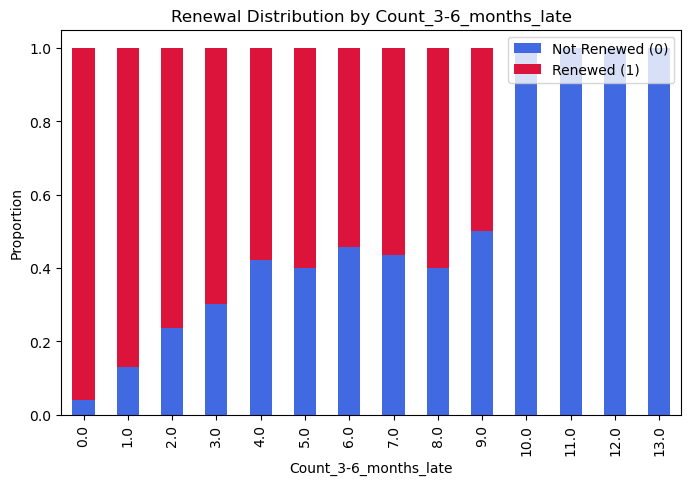


=== Crosstab for Count_3-6_months_late ===
renewal                    0      1
Count_3-6_months_late              
0.0                    0.039  0.961
1.0                    0.131  0.869
2.0                    0.235  0.765
3.0                    0.302  0.698
4.0                    0.422  0.578
5.0                    0.399  0.601
6.0                    0.456  0.544
7.0                    0.435  0.565
8.0                    0.400  0.600
9.0                    0.500  0.500
10.0                   1.000  0.000
11.0                   1.000  0.000
12.0                   1.000  0.000
13.0                   1.000  0.000


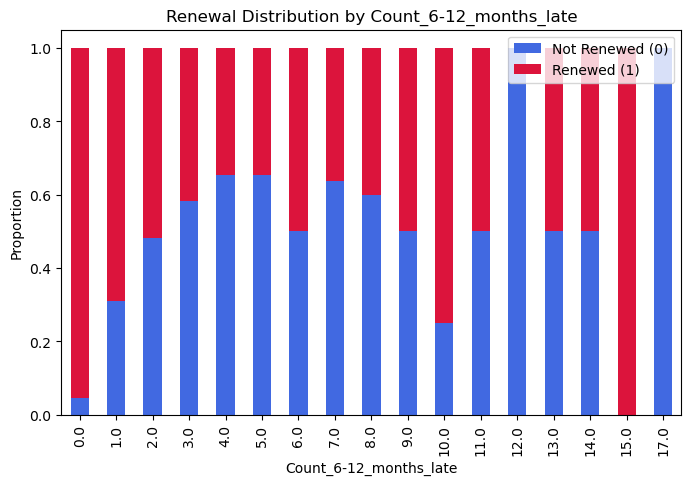


=== Crosstab for Count_6-12_months_late ===
renewal                     0      1
Count_6-12_months_late              
0.0                     0.045  0.955
1.0                     0.309  0.691
2.0                     0.482  0.518
3.0                     0.584  0.416
4.0                     0.654  0.346
5.0                     0.652  0.348
6.0                     0.500  0.500
7.0                     0.636  0.364
8.0                     0.600  0.400
9.0                     0.500  0.500
10.0                    0.250  0.750
11.0                    0.500  0.500
12.0                    1.000  0.000
13.0                    0.500  0.500
14.0                    0.500  0.500
15.0                    0.000  1.000
17.0                    1.000  0.000


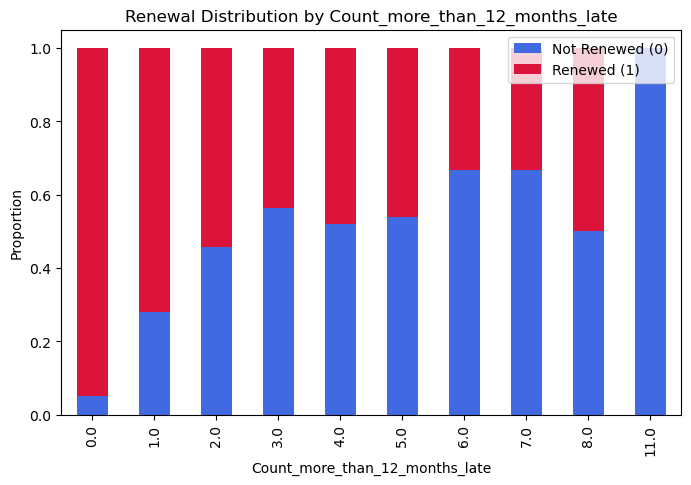


=== Crosstab for Count_more_than_12_months_late ===
renewal                             0      1
Count_more_than_12_months_late              
0.0                             0.049  0.951
1.0                             0.279  0.721
2.0                             0.458  0.542
3.0                             0.563  0.437
4.0                             0.521  0.479
5.0                             0.538  0.462
6.0                             0.667  0.333
7.0                             0.667  0.333
8.0                             0.500  0.500
11.0                            1.000  0.000


In [48]:
import matplotlib.pyplot as plt

late_features = [
    "Count_3-6_months_late",
    "Count_6-12_months_late",
    "Count_more_than_12_months_late"
]

for feat in late_features:
    # Crosstab for proportions
    ct = pd.crosstab(
        OG_proc[feat], 
        OG_proc['renewal'], 
        normalize='index'
    )

    # Plot
    ct.plot(
        kind="bar", stacked=True, 
        color=["royalblue", "crimson"], figsize=(8,5)
    )
    plt.title(f"Renewal Distribution by {feat}")
    plt.ylabel("Proportion")
    plt.xlabel(feat)
    plt.legend(["Not Renewed (0)", "Renewed (1)"])
    plt.show()

    # Print the table as well
    print(f"\n=== Crosstab for {feat} ===")
    print(ct.round(3))


In [51]:
# Count records for values > 10 in Count_6-12_months_late, grouped by renewal
above_10_counts = (
    OG_proc[OG_proc['Count_6-12_months_late'] > 0]
    .groupby(['Count_6-12_months_late', 'renewal'])
    .size()
    .unstack(fill_value=0)
)

above_10_counts

renewal                   0     1
Count_6-12_months_late           
1.0                     828  1852
2.0                     334   359
3.0                     185   132
4.0                      85    45
5.0                      30    16
6.0                      13    13
7.0                       7     4
8.0                       3     2
9.0                       2     2
10.0                      1     3
11.0                      1     1
12.0                      1     0
13.0                      1     1
14.0                      1     1
15.0                      0     1
17.0                      1     0

In [55]:
col = "premium"  # you can change this to any numeric column

# Recompute bounds for this column
Q1 = OG_proc[col].quantile(0.25)
Q3 = OG_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outliers above UQR
outlier_counts = (
    OG_proc.loc[OG_proc[col] > upper, col]
    .value_counts()
    .sort_index()
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts above upper bound:")
print(outlier_counts)


Upper Bound = 26400.00
Outlier value counts above upper bound:
premium
28500    801
30600    474
32700    688
34800    392
36900    359
39000    259
41100    207
43200    158
45300    141
47400    134
49500    100
51600     81
53700     71
55800     52
57900    187
60000    419
Name: count, dtype: int64


### Premium Outlier Analysis

Using the IQR method, the **upper bound** for premiums was calculated as:

- **Upper Bound = 26,400**


- **Findings:**  
  - Premiums above 26,400 are flagged as outliers.  
  - A total of **4,523 records** fall into this category.  
  - Distinct premium values observed beyond the upper bound are structured and occur in multiples of 2,100.



- **Interpretation:**  
  - These values appear to be **systematic premium brackets**, not random errors.  
  - The structured increments suggest **genuine high-value policies** rather than noise.  
  - While they are statistical outliers, removing them might lead to loss of important information on high-paying customers.

- **Decision:**  
  Retain these records, but keep in mind their outlier nature when modeling.  
  Tree-based models (e.g., XGBoost, Random Forest) can naturally handle such skewed distributions, whereas normalization/standardization may be more appropriate for statistical models.


In [58]:
# Find violations where premiums paid > age
violations_df = OG_proc[
    OG_proc['no_of_premiums_paid'] > OG_proc['age_in_years']
][['age_in_years', 'no_of_premiums_paid', 'renewal']]

# Count how many
print(f"Total violations (premiums > age): {len(violations_df)}")

# Display the first few violating records
display(violations_df.head(20))


Total violations (premiums > age): 19


age_in_years  no_of_premiums_paid  renewal
6084             33                   37        1
7095             30                   31        1
9608             36                   50        0
15665            32                   34        1
16203            33                   38        0
19813            29                   30        1
26644            53                   60        1
41724            48                   58        1
45055            45                   47        0
46456            27                   29        1
49298            27                   33        1
53682            34                   38        1
57682            25                   31        1
62809            36                   38        1
67876            42                   59        0
69824            28                   31        1
77603            29                   30        1
77731            36                   37        1
79337            45                   50        0

In [61]:
# Compute total late payments on the fly
total_lates = (
    OG_proc['Count_3-6_months_late'].fillna(0) +
    OG_proc['Count_6-12_months_late'].fillna(0) +
    OG_proc['Count_more_than_12_months_late'].fillna(0)
)

# Find violations
violations_lates = (total_lates > OG_proc['no_of_premiums_paid']).sum()
print(f"Records where total late payments > premiums paid: {violations_lates}")

# Get violating records (without adding total_lates column to OG_proc)
violating_records = OG_proc.loc[
    total_lates > OG_proc['no_of_premiums_paid'],
    ['Count_3-6_months_late','Count_6-12_months_late',
     'Count_more_than_12_months_late','no_of_premiums_paid','renewal']
]

violating_records


Records where total late payments > premiums paid: 242


Count_3-6_months_late  Count_6-12_months_late  \
7                        1.0                     6.0   
40                       0.0                    10.0   
566                      0.0                     3.0   
647                      0.0                     4.0   
930                      0.0                     2.0   
...                      ...                     ...   
77453                    1.0                     3.0   
77758                    1.0                     5.0   
77942                    1.0                     6.0   
78500                    1.0                     2.0   
79625                    0.0                     3.0   

       Count_more_than_12_months_late  no_of_premiums_paid  renewal  
7                                 4.0                    3        0  
40                                0.0                    8        0  
566                               1.0                    3        0  
647                               0.0                    2        1  
930                               1.0                    2        0  
...                               ...                  ...      ...  
77453                             1.0                    4        0  
77758                             2.0                    5        0  
77942                             0.0                    5        0  
78500                             0.0                    2        1  
79625                             0.0                    2        1  

[242 rows x 5 columns]

### Handling Logical Inconsistencies in Late Payments

While exploring the dataset, we checked if the **total number of late payments** across all categories exceeded the **number of premiums paid**:

total_lates = Count_3_6_months_late + Count_6_12_months_late + Count_more_than_12_months_late

Violation if: total_lates > no_of_premiums_paid

---

**Findings:**  
- **242 records** (≈0.3% of the dataset) violated this condition.  
- Example: A customer with `no_of_premiums_paid = 2` but `total_lates = 6`.  
- These are **logically inconsistent**, since a customer cannot have more late payments than total premiums made.

---

**Options to Handle:**  
1. **Drop the violating records**  
   - Simple and clean, removes only a very small portion of data.  
2. **Cap total late counts** at the number of premiums paid  
   - Preserves all rows but may distort the real late distribution.  
3. **Investigate renewal outcomes** among these cases  
   - If most are non-renewals, they may still carry useful signal.

---

**Decision:**  
Since the violations are rare (**242 out of ~80k**), the preferred approach is to **drop these rows** for cleaner data integrity.


### Age Outlier Analysis

Using the IQR method, the **upper bound for age** was calculated as **93.5 years**.

- **Findings:**  
  - A total of **44 records** were flagged as outliers.  
  - Distinct values range from **94 to 103 years**.  
  - These are only slightly beyond the statistical cutoff and are realistic ages.

- **Interpretation:**  
  - The deviations are not extreme compared to the upper bound.  
  - Elderly customers (**94–103 years**) are plausible and valid records, not data entry errors.  
  - Removing them would unnecessarily reduce data diversity.

- **Decision:**  
  We will **keep these records**, as they represent genuine customers and do not distort the dataset.


In [69]:
# Pick the feature we are analyzing
col = "no_of_premiums_paid"

# Get its bounds
Q1 = OG_proc[col].quantile(0.25)
Q3 = OG_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outlier rows
outlier_data = OG_proc.loc[OG_proc[col] > upper, [col, target_col]]

# Count target distribution for each distinct outlier value
outlier_summary = (
    outlier_data.groupby([col, target_col])
    .size()
    .unstack(fill_value=0)  # ensures both 0 and 1 appear
    .rename(columns={0: "Not Renewed", 1: "Renewed"})
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts by target:")
display(outlier_summary)


Upper Bound = 24.50
Outlier value counts by target:


renewal              Not Renewed  Renewed
no_of_premiums_paid                      
25                            23      282
26                            15      226
27                             8      178
28                            12      140
29                             8      111
30                             6       85
31                             5       56
32                             6       45
33                             2       41
34                             1       37
35                             2       29
36                             0       23
37                             0       14
38                             3        5
39                             0        5
40                             0        6
41                             1        5
42                             0        7
43                             1        2
44                             0        4
45                             1        2
47                             1        4
48                             0        3
49                             0        1
50                             2        1
51                             0        3
52                             0        2
53                             0        2
54                             0        2
55                             0        1
56                             0        3
58                             0        2
59                             1        0
60                             0        1

### Outliers in *Number of Premiums Paid*

- **Observation:**  
  - The upper bound for *no_of_premiums_paid* based on the IQR method was **24.5**.  
  - We identified **1426 records** above this threshold, with values ranging from **25 to 60**.  
  - Distribution of target labels shows that customers with higher premium counts are **predominantly renewed**.  

- **Example:**  
  - At `no_of_premiums_paid = 25`, ~92% customers renewed.  
  - Even at higher counts (e.g., 40+), most customers still renewed.  

- **Interpretation:**  
  - These values are **not data entry errors** but likely represent **long-term policyholders** who consistently renewed their plans.  
  - Hence, they are **business-relevant extreme values**, not anomalies to be removed.  

- **Decision:**  
  - **Keep these outliers as-is.**  
  - They carry **important predictive signal** about loyalty/renewal behavior.  
  - No imputation or capping applied.  


In [73]:
upper_bound = 468210
high_income = OG_proc[OG_proc['Income'] > upper_bound]
normal_income = OG_proc[OG_proc['Income'] <= upper_bound]

print("Renewal rate (high income):", high_income['renewal'].mean())
print("Renewal rate (normal income):", normal_income['renewal'].mean())


Renewal rate (high income): 0.9521586931155193
Renewal rate (normal income): 0.9367484461890743


In [75]:
# Compute IQR bounds for Income
Q1 = OG_proc['Income'].quantile(0.25)
Q3 = OG_proc['Income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound for Income (IQR method):", upper_bound)

# Subset of records above upper bound
income_outliers = OG_proc[OG_proc['Income'] > upper_bound]

# Total count
print("Number of records above upper bound:", income_outliers.shape[0])

# Breakdown by target
print("\nBreakdown by renewal:")
print(income_outliers['renewal'].value_counts())


Upper Bound for Income (IQR method): 468210.0
Number of records above upper bound: 3428

Breakdown by renewal:
renewal
1    3264
0     164
Name: count, dtype: int64


In [77]:
# Max income where renewal == 0
max_income_nonrenew = OG_proc.loc[OG_proc['renewal'] == 0, 'Income'].max()
print("Max Income (renewal = 0):", max_income_nonrenew)

# Number of records with income greater than that
count_higher = (OG_proc['Income'] > max_income_nonrenew).sum()
print("Number of records with Income > that value:", count_higher)


Max Income (renewal = 0): 7500070
Number of records with Income > that value: 16


### Conclusion on Income Outliers

- Using the IQR method, the **upper bound for income** was identified as **468,210**.  
- **3,428 records (~4.3% of the dataset)** fall above this bound.  
- Among these high-income customers:  
  - **Renewal rate = 95.2%** (vs. 93.7% for normal income customers).  
  - Only **164 customers (≈4.8%) did not renew**.  
- The **maximum income among non-renewed customers** is **7,500,070**, and there are **only 16 customers** with income greater than this.  

**Interpretation:**  
- High-income outliers are not random noise but represent a valid customer segment.  
- They exhibit **higher renewal rates than the normal-income group**, indicating strong loyalty among high-income customers.  
- Removing or imputing these values would risk discarding meaningful predictive information.  

**Decision:**  
 We will **retain income outliers without imputation**, as they carry valuable signal for predicting renewals.  


### Decision on Outlier Handling

During data exploration, we identified several features (e.g., **Income, Premium, No. of Premiums Paid, Age**) with statistical outliers based on the IQR rule.  

- However, further analysis showed that:
  - Many of these outliers correspond to **valid business cases** (e.g., customers with very high income or long premium histories).  
  - Outliers are not simply noise — they carry **useful information** about extreme but real customer behaviors.  
  - Renewal rates among outliers are often **similar or higher** compared to non-outliers (e.g., high-income customers renew more often).  

For this reason, we **decided not to impute or remove outliers**.  
Instead, we will keep them as-is to preserve potential signal.

---

**Modeling Direction:**  

- Since outliers distort linear models and distance-based models (Logistic Regression, KNN, SVM), we will prefer **tree-based ensembles** that are robust to extreme values.


In [87]:
# Identify categorical columns
cat_cols = OG_proc.select_dtypes(include=['object']).columns.tolist()

# Separate binary vs multi-categorical
binary_cats = [c for c in cat_cols if OG_proc[c].nunique() == 2]
multi_cats  = [c for c in cat_cols if OG_proc[c].nunique() > 2]


In [89]:

print("Categorical:", cat_cols)
print("Binary categorical:", binary_cats)
print("Multi categorical:", multi_cats)

Categorical: ['sourcing_channel', 'residence_area_type']
Binary categorical: ['residence_area_type']
Multi categorical: ['sourcing_channel']


In [91]:
# Apply one-hot encoding differently
OG_proc_encoded = pd.get_dummies(
    OG_proc,
    columns=binary_cats,
    drop_first=True  # safe for binary
)

OG_proc_encoded = pd.get_dummies(
    OG_proc_encoded,
    columns=multi_cats,
    drop_first=False  # keep all categories for multi-categorical
)

In [93]:
print("Shape before encoding:", OG_proc.shape)
print("Shape after encoding :", OG_proc_encoded.shape)

Shape before encoding: (79853, 12)
Shape after encoding : (79853, 16)


In [95]:
OG_proc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   Income                            79853 non-null  int64  
 2   Count_3-6_months_late             79756 non-null  float64
 3   Count_6-12_months_late            79756 non-null  float64
 4   Count_more_than_12_months_late    79756 non-null  float64
 5   application_underwriting_score    76879 non-null  float64
 6   no_of_premiums_paid               79853 non-null  int64  
 7   premium                           79853 non-null  int64  
 8   renewal                           79853 non-null  int64  
 9   age_in_years                      79853 non-null  int64  
 10  residence_area_type_Urban         79853 non-null  bool   
 11  sourcing_channel_A                79853 non-null  bool   
 12  sour

In [97]:
OG_proc_encoded.describe(include='all')

perc_premium_paid_by_cash_credit        Income  Count_3-6_months_late  \
count                       79853.000000  7.985300e+04           79756.000000   
unique                               NaN           NaN                    NaN   
top                                  NaN           NaN                    NaN   
freq                                 NaN           NaN                    NaN   
mean                            0.314288  2.088472e+05               0.248671   
std                             0.334915  4.965826e+05               0.691468   
min                             0.000000  2.403000e+04               0.000000   
25%                             0.034000  1.080100e+05               0.000000   
50%                             0.167000  1.665600e+05               0.000000   
75%                             0.538000  2.520900e+05               0.000000   
max                             1.000000  9.026260e+07              13.000000   

        Count_6-12_months_late  Count_more_than_12_months_late  \
count             79756.000000                    79756.000000   
unique                     NaN                             NaN   
top                        NaN                             NaN   
freq                       NaN                             NaN   
mean                  0.078188                        0.060008   
std                   0.436507                        0.312023   
min                   0.000000                        0.000000   
25%                   0.000000                        0.000000   
50%                   0.000000                        0.000000   
75%                   0.000000                        0.000000   
max                  17.000000                       11.000000   

        application_underwriting_score  no_of_premiums_paid       premium  \
count                     76879.000000         79853.000000  79853.000000   
unique                             NaN                  NaN           NaN   
top                                NaN                  NaN           NaN   
freq                               NaN                  NaN           NaN   
mean                         99.067291            10.863887  10924.507533   
std                           0.739799             5.170687   9401.676542   
min                          91.900000             2.000000   1200.000000   
25%                          98.810000             7.000000   5400.000000   
50%                          99.210000            10.000000   7500.000000   
75%                          99.540000            14.000000  13800.000000   
max                          99.890000            60.000000  60000.000000   

             renewal  age_in_years residence_area_type_Urban  \
count   79853.000000  79853.000000                     79853   
unique           NaN           NaN                         2   
top              NaN           NaN                      True   
freq             NaN           NaN                     48183   
mean        0.937410     51.607404                       NaN   
std         0.242226     14.270484                       NaN   
min         0.000000     21.000000                       NaN   
25%         1.000000     41.000000                       NaN   
50%         1.000000     51.000000                       NaN   
75%         1.000000     62.000000                       NaN   
max         1.000000    103.000000                       NaN   

       sourcing_channel_A sourcing_channel_B sourcing_channel_C  \
count               79853              79853              79853   
unique                  2                  2                  2   
top                  True              False              False   
freq                43134              63341              67814   
mean                  NaN                NaN                NaN   
std                   NaN                NaN                NaN   
min                   NaN                NaN                NaN   
25%         

###  Observation about missing late payment counts  

Interestingly, whenever we encounter missing values in the late payment fields  
(`Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late`),  
all three of them are missing together for the same customer records.  

This suggests that the missingness is not random but systematic. One possible explanation is that for these customers, there were simply no late payments at all, and the system chose to leave all late payment fields blank instead of recording zeros.  

This makes the assumption of imputing missing values with zero even more plausible,  
because the absence of data across all three late payment columns may effectively indicate  
“no late payments recorded.”  

At the same time, this pattern is worth validating further, since systematic missingness  
could reflect a data-entry convention rather than random data loss.  


###  Why imputing late payment counts with zero is reasonable  

The late payment fields (`Count_3-6_months_late`, `Count_6-12_months_late`,  
`Count_more_than_12_months_late`) are dominated by zeros — the majority of customers have no late payments.  

Because of this, even if we impute missing values using **mean**, **median**, or **mode**,  
the result would still effectively be zero.  

This reinforces the assumption that filling missing values with `0` is consistent with  
the underlying data distribution and does not distort the dataset.  


In [101]:
# List of late payment columns
late_payment_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]

# Impute missing values with zero
OG_proc_encoded[late_payment_cols] = OG_proc_encoded[late_payment_cols].fillna(0)

# Quick check
print(OG_proc_encoded[late_payment_cols].isnull().sum())


Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
dtype: int64


###  Handling missing values in `application_underwriting_score`  

The column `application_underwriting_score` has a noticeable number of missing values.  
Unlike the late payment counts, where missing values are clearly dominated by zeros,  
this feature is a continuous score and may be influenced by other attributes such as  
income, premium amount, age, or number of premiums paid.  

If we were to impute it with a simple **mean**, **median**, or **mode**,  
we would lose the variation and introduce bias by assigning the same value across all missing entries.  

To better preserve relationships in the data, a more suitable approach is to use  
**KNN imputation**. This method estimates missing values by looking at the most  
similar records (nearest neighbors) and imputing based on their values.  
This way, the imputed score is more context-aware and consistent with the profile  
of the customer.  


In [104]:
# Select numeric columns (to help KNN find neighbors)
num_cols = OG_proc_encoded.select_dtypes(include=['int64','float64']).columns.tolist()

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN to the entire encoded dataset
OG_proc_encoded_imputed = pd.DataFrame(
    knn_imputer.fit_transform(OG_proc_encoded),
    columns=OG_proc_encoded.columns,
    index=OG_proc_encoded.index
)

# Replace back into OG_proc_encoded (only underwriting score, but now everything imputed)
OG_proc_encoded['application_underwriting_score'] = OG_proc_encoded_imputed['application_underwriting_score']


# Check missing count
print("Missing in application_underwriting_score after KNN:",
      OG_proc_encoded['application_underwriting_score'].isnull().sum())

Missing in application_underwriting_score after KNN: 0


In [105]:
# Step 1: Copy OG_proc
OG_proc_imputed = OG_proc.copy()

# Step 2: Impute missing values from OG_proc_encoded_imputed
cols_to_impute = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late',
    'application_underwriting_score'
]

for col in cols_to_impute:
    OG_proc_imputed[col] = OG_proc_encoded_imputed[col]

# Step 3: Check missing values (should be 0 now)
print("Missing values after imputation:\n", OG_proc_imputed[cols_to_impute].isnull().sum())


Missing values after imputation:
 Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
application_underwriting_score    0
dtype: int64


In [106]:
OG_proc_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
age_in_years                        0
dtype: int64

###  Separate datasets for different model families  

Since tree-based models (e.g., Decision Tree, Random Forest, XGBoost) do not require  
normalization or standardization, we will keep one dataset in its **raw numeric form**  
(after imputations and one-hot encoding).  

However, for models that are sensitive to feature scale (e.g., Logistic Regression,  
KNN, SVM, Neural Networks), we will maintain a **separately standardized dataset**.  

- **`OG_proc_encoded`** → for tree-based models (no scaling).  
- **`OG_proc_scaled`** → for statistical / distance-based models (after standardization).  

This ensures that each model type gets the input in the most suitable form  
without mixing preprocessing requirements.


In [110]:
# Tree dataset
OG_proc_tree = OG_proc_encoded_imputed.copy()

In [112]:
# Statistical dataset (standardization)
OG_proc_stat = OG_proc_encoded_imputed.copy()
scaler_stat = StandardScaler()
num_cols_stat = OG_proc_stat.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_proc_stat[num_cols_stat] = scaler_stat.fit_transform(OG_proc_stat[num_cols_stat])


In [119]:
# Normalized dataset
OG_proc_norm = OG_proc_encoded_imputed.copy()
scaler_norm = MinMaxScaler()
num_cols_norm = OG_proc_norm.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_proc_norm[num_cols_norm] = scaler_norm.fit_transform(OG_proc_norm[num_cols_norm])

### Handling Imbalanced Target (Renewal vs Non-Renewal)

In our dataset, around 93% of customers renew, while only 7% do not renew.  
If we train on this data directly, models will become biased towards predicting renewals, missing the critical minority class of non-renewals.

To address this, we applied different strategies:
- **Tree-based models (XGBoost, Random Forest):** retain the imbalanced dataset and adjust `scale_pos_weight` to emphasize the minority class.
- **Statistical and neural models (Logistic Regression, SVM, KNN):** create balanced training sets using oversampling (SMOTE/ADASYN) so that non-renewals are equally represented.
- **Evaluation metrics:** we will rely on balanced accuracy, F1-scores per class, and PR-AUC, to ensure the model performs well for both renewals and non-renewals.

This approach helps avoid missing non-renewals while still retaining high accuracy on renewals.


In [124]:
smote = SMOTE(random_state=42)

In [126]:
# For standardized dataset
OG_proc_stat_balanced, y_stat_bal = smote.fit_resample(
    OG_proc_stat.drop(columns=[target_col]),
    OG_proc_stat[target_col]
)

In [128]:
# Recombine into DataFrame
OG_proc_stat_balanced = pd.DataFrame(OG_proc_stat_balanced, columns=OG_proc_stat.drop(columns=[target_col]).columns)
OG_proc_stat_balanced[target_col] = y_stat_bal

In [131]:
# For normalized dataset
OG_proc_norm_balanced, y_norm_bal = smote.fit_resample(
    OG_proc_norm.drop(columns=[target_col]),
    OG_proc_norm[target_col]
)
# Recombine into DataFrame
OG_proc_norm_balanced = pd.DataFrame(OG_proc_norm_balanced, columns=OG_proc_norm.drop(columns=[target_col]).columns)
OG_proc_norm_balanced[target_col] = y_norm_bal


In [133]:

# 3) Encoded + Imputed dataset

X_enc = OG_proc_encoded_imputed.drop(columns=[target_col])
y_enc = OG_proc_encoded_imputed[target_col]

X_enc_bal, y_enc_bal = smote.fit_resample(X_enc, y_enc)
OG_proc_encoded_imputed_balanced = pd.DataFrame(X_enc_bal, columns=X_enc.columns)
OG_proc_encoded_imputed_balanced[target_col] = y_enc_bal


In [135]:
OG_proc_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
age_in_years                        0
dtype: int64

In [142]:

ros = RandomOverSampler(random_state=42)
X_proc = OG_proc_imputed.drop(columns=[target_col])
y_proc = OG_proc_imputed[target_col]

X_proc_bal, y_proc_bal = ros.fit_resample(X_proc, y_proc)

OG_proc_imputed_balanced = pd.DataFrame(X_proc_bal, columns=X_proc.columns)
OG_proc_imputed_balanced[target_col] = y_proc_bal


In [145]:
print("Balanced stat dataset shape:", OG_proc_stat_balanced.shape)
print("Balanced norm dataset shape:", OG_proc_norm_balanced.shape)
print("Balanced encoded_imputed dataset shape:", OG_proc_encoded_imputed_balanced.shape)
print("Balanced OG_proc shape:", OG_proc_imputed_balanced.shape)

print("\nClass distribution (stat):\n", OG_proc_stat_balanced[target_col].value_counts())
print("\nClass distribution (norm):\n", OG_proc_norm_balanced[target_col].value_counts())
print("\nClass distribution (encoded_imputed):\n", OG_proc_encoded_imputed_balanced[target_col].value_counts())
print("\nClass distribution (balanced):\n", OG_proc_imputed_balanced[target_col].value_counts())

Balanced stat dataset shape: (149710, 16)
Balanced norm dataset shape: (149710, 16)
Balanced encoded_imputed dataset shape: (149710, 16)
Balanced OG_proc shape: (149710, 12)

Class distribution (stat):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (norm):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (encoded_imputed):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (balanced):
 renewal
1    74855
0    74855
Name: count, dtype: int64


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_91800/4227589052.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature',


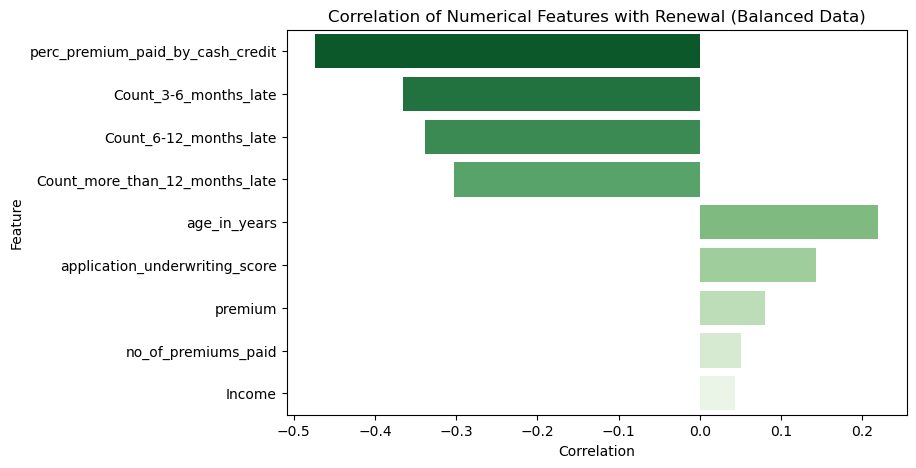

In [151]:
# ----------------------------
# 1) Numerical (Continuous) vs Target (Balanced)
# ----------------------------
results_num_bal = []
for col in num_cols:
    if col != target_col:
        corr, p = pointbiserialr(
            OG_proc_encoded_imputed_balanced[col],
            OG_proc_encoded_imputed_balanced[target_col]
        )
        results_num_bal.append([col, corr, p])

num_corr_bal_df = pd.DataFrame(results_num_bal, columns=['Feature','Correlation','p-value'])

plt.figure(figsize=(8,5))
sns.barplot(x='Correlation', y='Feature',
            data=num_corr_bal_df.sort_values(by='Correlation', key=abs, ascending=False),
            palette="Greens_r")
plt.title("Correlation of Numerical Features with Renewal (Balanced Data)")
plt.show()


In [153]:
OG_proc_imputed_balanced.describe()

perc_premium_paid_by_cash_credit        Income  Count_3-6_months_late  \
count                     149710.000000  1.497100e+05          149710.000000   
mean                           0.460482  1.944048e+05               0.553597   
std                            0.376975  3.897055e+05               1.097750   
min                            0.000000  2.403000e+04               0.000000   
25%                            0.074000  9.907000e+04               0.000000   
50%                            0.403000  1.523800e+05               0.000000   
75%                            0.861000  2.359000e+05               1.000000   
max                            1.000000  9.026260e+07              13.000000   

       Count_6-12_months_late  Count_more_than_12_months_late  \
count           149710.000000                   149710.000000   
mean                 0.301763                        0.193153   
std                  0.879262                        0.590622   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 17.000000                       11.000000   

       application_underwriting_score  no_of_premiums_paid        premium  \
count                   149710.000000        149710.000000  149710.000000   
mean                        98.976277            10.651186   10312.068666   
std                          0.802025             5.488891    9077.758929   
min                         91.900000             2.000000    1200.000000   
25%                         98.690000             7.000000    5400.000000   
50%                         99.140000            10.000000    7500.000000   
75%                         99.500000            14.000000   13800.000000   
max                         99.890000            60.000000   60000.000000   

        age_in_years        renewal  
count  149710.000000  149710.000000  
mean       49.173649       0.500000  
std        13.855414       0.500002  
min        21.000000       0.000000  
25%        39.000000       0.000000  
50%        48.000000       0.500000  
75%        59.000000       1.000000  
max       103.000000       1.000000

In [155]:
cat_cols

['sourcing_channel', 'residence_area_type']

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_91800/1975972667.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CramersV', y='Feature',


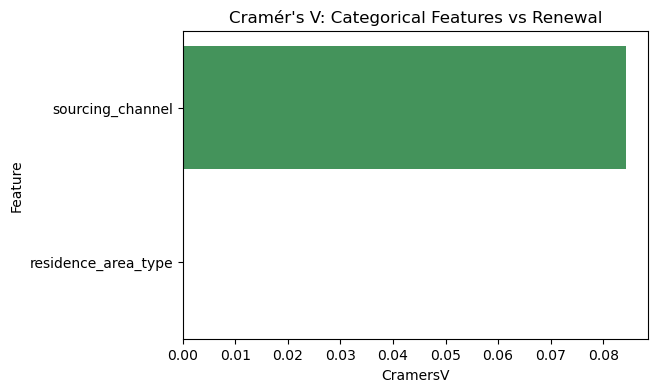

In [157]:
# ----------------------------
# 2) Categorical vs Target
# ----------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

results_cat = []
for col in cat_cols:
    cv = cramers_v(OG_proc_imputed_balanced[col], OG_proc_imputed_balanced[target_col])
    results_cat.append([col, cv])

cat_corr_df = pd.DataFrame(results_cat, columns=['Feature','CramersV'])

plt.figure(figsize=(6,4))
sns.barplot(x='CramersV', y='Feature',
            data=cat_corr_df.sort_values(by='CramersV', ascending=False),
            palette="Greens_r")
plt.title("Cramér's V: Categorical Features vs Renewal")
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def class_distribution_by_categoricals(df, cat_cols, target_col="renewal",
                                       save_summary=False, out_dir="eda_outputs"):
    """
    For each categorical column in cat_cols:
      - computes counts and percentages of target classes per category
      - returns a dict of summary DataFrames
      - plots renewal % per category (barplot)
      - optionally saves CSV and plot PNG for each feature
    
    Returns:
      summaries: dict {col_name: summary_df}
    """
    os.makedirs(out_dir, exist_ok=True)
    summaries = {}
    sns.set_style("whitegrid")

    for col in cat_cols:
        if col not in df.columns:
            print(f"Warning: {col} not in dataframe columns — skipping.")
            continue
        # drop rows where category or target is missing (or you may choose to keep)
        temp = df[[col, target_col]].dropna(subset=[col, target_col]).copy()
        # counts per category and per class
        counts = temp.groupby(col)[target_col].value_counts().unstack(fill_value=0)
        counts.columns = [f"count_{int(c)}" if isinstance(c, (int, float)) else f"count_{c}" for c in counts.columns]
        counts['count_total'] = counts.sum(axis=1)
        # percentages (row-normalized)
        pct = temp.groupby(col)[target_col].value_counts(normalize=True).unstack(fill_value=0) * 100
        pct.columns = [f"pct_{int(c)}" if isinstance(c, (int, float)) else f"pct_{c}" for c in pct.columns]
        # combine
        summary = pd.concat([counts, pct], axis=1).reset_index()
        # ensure columns for both classes exist
        for c in [0,1]:
            if f"count_{c}" not in summary.columns:
                summary[f"count_{c}"] = 0
            if f"pct_{c}" not in summary.columns:
                summary[f"pct_{c}"] = 0.0
        # renewal rate alias
        summary['renewal_rate_pct'] = summary['pct_1'].round(2)
        # sort by renewal rate or total count (choose whichever you prefer)
        summary = summary.sort_values(by='renewal_rate_pct', ascending=False).reset_index(drop=True)

        summaries[col] = summary

        # Print quick textual summary
        print(f"\n=== Class distribution for '{col}' (top rows) ===")
        display_cols = [col, 'count_total', 'count_0', 'count_1', 'pct_0', 'pct_1', 'renewal_rate_pct']
        print(summary[display_cols].head(20).to_string(index=False))

        # Plot renewal % per category
        plt.figure(figsize=(10, 5 if summary.shape[0] <= 10 else 0.5*summary.shape[0] + 3))
        sns.barplot(data=summary, x='renewal_rate_pct', y=col, orient='h')
        plt.xlabel("Renewal Rate (%)")
        plt.title(f"Renewal Rate by {col}")
        plt.xlim(0, 100)
        plt.tight_layout()

        if save_summary:
            fig_path = os.path.join(out_dir, f"renewal_rate_by_{col}.png")
            csv_path = os.path.join(out_dir, f"summary_by_{col}.csv")
            plt.savefig(fig_path, dpi=300, bbox_inches='tight')
            summary.to_csv(csv_path, index=False)
            print(f"Saved plot -> {fig_path}")
            print(f"Saved CSV  -> {csv_path}")

        plt.show()

    return summaries

# -----------------------
# Usage example:
# -----------------------
cat_features = ["residence_area_type", "sourcing_channel"]  # add other categorical columns you want
summaries = class_distribution_by_categoricals(OG_proc, cat_features, target_col="Renewal",
                                               save_summary=True, out_dir="eda_outputs")
# summaries['residence_area_type']  # inspect specific summary DataFrame


KeyError: "['Renewal'] not in index"

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_91800/1853467726.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")


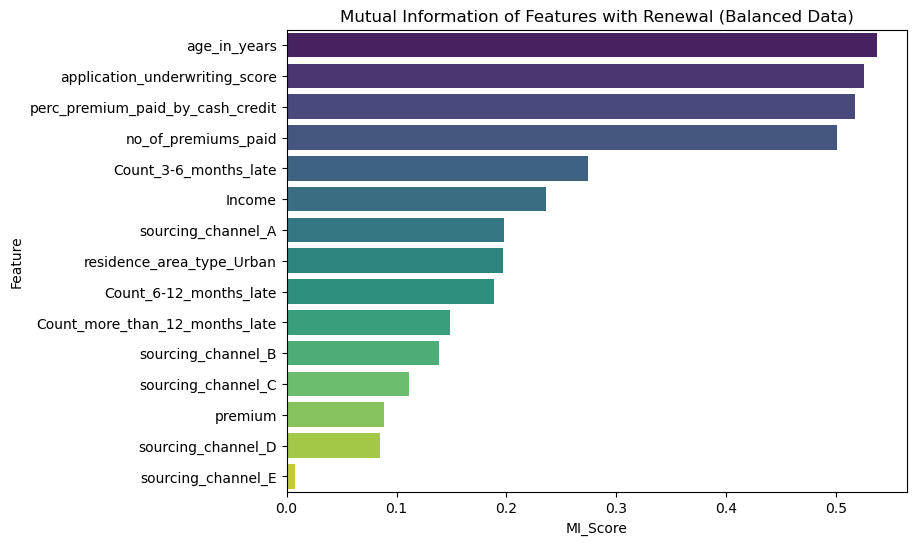

                      Feature  MI_Score
10         sourcing_channel_A  0.198054
9   residence_area_type_Urban  0.196515
11         sourcing_channel_B  0.138849
12         sourcing_channel_C  0.111666
13         sourcing_channel_D  0.084748
14         sourcing_channel_E  0.007957


In [160]:
from sklearn.feature_selection import mutual_info_classif

# Prepare data (use balanced + imputed + encoded dataset)
X_bal = OG_proc_encoded_imputed_balanced.drop(columns=[target_col])
y_bal = OG_proc_encoded_imputed_balanced[target_col]

# Compute Mutual Information for all features
mi_scores_bal = mutual_info_classif(X_bal, y_bal, discrete_features='auto', random_state=42)

# Put into DataFrame for easy view
mi_df_bal = pd.DataFrame({
    "Feature": X_bal.columns,
    "MI_Score": mi_scores_bal
}).sort_values(by="MI_Score", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")
plt.title("Mutual Information of Features with Renewal (Balanced Data)")
plt.show()

# Focus on sourcing_channel & residence_area_type
print(mi_df_bal[mi_df_bal['Feature'].str.contains("sourcing_channel|residence_area_type")])


### Feature Importance Insights

- No single feature shows strong predictive power for renewal when analyzed individually.  
- Late payment history and premium-related variables provide the highest signal, but even their effect sizes are small.  
- Mutual Information and correlation analysis confirm that most features carry only weak standalone associations with renewal.  
- However, when combined in multivariate models, these weak signals accumulate and allow tree-based methods (e.g., XGBoost) to achieve strong predictive performance (AUC ~0.85).  

**Takeaway:** The dataset does not have a "silver bullet" predictor. Predictive power comes from combining many weak features rather than relying on one dominant driver.


In [162]:
anchor = 'residence_area_type'   # fixed first index
target = 'renewal'
n_bins = 4                       # quartiles for numeric features

# features to pair with the anchor (exclude anchor + target)
all_feats = [c for c in OG_proc_imputed_balanced.columns if c not in [anchor, target]]

def bin_numeric(series, q=n_bins):
    """Bin numeric series with qcut; fallback to equal-width if needed."""
    try:
        return pd.qcut(series, q=q, duplicates='drop')
    except Exception:
        # fallback when too many ties or low unique values
        return pd.cut(series, bins=q)

crosstabs = {}  # store results if you want to reuse

for feat in all_feats:
    s_anchor = OG_proc_imputed_balanced[anchor]
    s_feat = OG_proc_imputed_balanced[feat]

    if pd.api.types.is_numeric_dtype(s_feat):
        idx2 = bin_numeric(s_feat, q=n_bins)
        title = f"{anchor} × {feat} (binned)"
        idx = [s_anchor, idx2]
    else:
        title = f"{anchor} × {feat}"
        idx = [s_anchor, s_feat]

    # Crosstab: row-wise proportions of renewal 0/1
    ct = pd.crosstab(idx, OG_proc_imputed_balanced[target], normalize='index')

    # Optional: nicer column names 0/1 → ['0','1']
    ct.columns = [0, 1]

    crosstabs[feat] = ct

    print(f"\n=== {title} ===")
    display(ct)   # in notebooks this renders like your example



=== residence_area_type × perc_premium_paid_by_cash_credit (binned) ===


0         1
residence_area_type perc_premium_paid_by_cash_credit                    
Rural               (-0.001, 0.074]                   0.242573  0.757427
                    (0.074, 0.403]                    0.355243  0.644757
                    (0.403, 0.861]                    0.621844  0.378156
                    (0.861, 1.0]                      0.785536  0.214464
Urban               (-0.001, 0.074]                   0.231246  0.768754
                    (0.074, 0.403]                    0.354597  0.645403
                    (0.403, 0.861]                    0.628965  0.371035
                    (0.861, 1.0]                      0.782568  0.217432


=== residence_area_type × Income (binned) ===


0         1
residence_area_type Income                                    
Rural               (24029.999, 99070.0]    0.597427  0.402573
                    (99070.0, 152380.0]     0.537583  0.462417
                    (152380.0, 235900.0]    0.470068  0.529932
                    (235900.0, 90262600.0]  0.395301  0.604699
Urban               (24029.999, 99070.0]    0.591792  0.408208
                    (99070.0, 152380.0]     0.521549  0.478451
                    (152380.0, 235900.0]    0.473875  0.526125
                    (235900.0, 90262600.0]  0.411829  0.588171


=== residence_area_type × Count_3-6_months_late (binned) ===


0         1
residence_area_type Count_3-6_months_late                    
Rural               (-0.001, 1.0]          0.447131  0.552869
                    (1.0, 13.0]            0.851248  0.148752
Urban               (-0.001, 1.0]          0.444079  0.555921
                    (1.0, 13.0]            0.853062  0.146938


=== residence_area_type × Count_6-12_months_late (binned) ===


0         1
residence_area_type Count_6-12_months_late                    
Rural               (-0.001, 17.0]          0.501286  0.498714
Urban               (-0.001, 17.0]          0.499152  0.500848


=== residence_area_type × Count_more_than_12_months_late (binned) ===


0         1
residence_area_type Count_more_than_12_months_late                    
Rural               (-0.001, 11.0]                  0.501286  0.498714
Urban               (-0.001, 11.0]                  0.499152  0.500848


=== residence_area_type × application_underwriting_score (binned) ===


0         1
residence_area_type application_underwriting_score                    
Rural               (91.899, 98.69]                 0.622738  0.377262
                    (98.69, 99.14]                  0.480551  0.519449
                    (99.14, 99.5]                   0.441577  0.558423
                    (99.5, 99.89]                   0.457338  0.542662
Urban               (91.899, 98.69]                 0.617020  0.382980
                    (98.69, 99.14]                  0.496084  0.503916
                    (99.14, 99.5]                   0.428470  0.571530
                    (99.5, 99.89]                   0.454212  0.545788


=== residence_area_type × no_of_premiums_paid (binned) ===


0         1
residence_area_type no_of_premiums_paid                    
Rural               (1.999, 7.0]         0.577634  0.422366
                    (7.0, 10.0]          0.429985  0.570015
                    (10.0, 14.0]         0.470093  0.529907
                    (14.0, 60.0]         0.503919  0.496081
Urban               (1.999, 7.0]         0.556865  0.443135
                    (7.0, 10.0]          0.444813  0.555187
                    (10.0, 14.0]         0.465699  0.534301
                    (14.0, 60.0]         0.516523  0.483477


=== residence_area_type × sourcing_channel ===


0         1
residence_area_type sourcing_channel                    
Rural               A                 0.466105  0.533895
                    B                 0.513403  0.486597
                    C                 0.542441  0.457559
                    D                 0.579302  0.420698
                    E                 0.511673  0.488327
Urban               A                 0.460627  0.539373
                    B                 0.508347  0.491653
                    C                 0.549970  0.450030
                    D                 0.579016  0.420984
                    E                 0.548480  0.451520


=== residence_area_type × premium (binned) ===


0         1
residence_area_type premium                               
Rural               (1199.999, 5400.0]  0.542856  0.457144
                    (5400.0, 7500.0]    0.534014  0.465986
                    (7500.0, 13800.0]   0.466836  0.533164
                    (13800.0, 60000.0]  0.419987  0.580013
Urban               (1199.999, 5400.0]  0.544788  0.455212
                    (5400.0, 7500.0]    0.529684  0.470316
                    (7500.0, 13800.0]   0.473330  0.526670
                    (13800.0, 60000.0]  0.425391  0.574609


=== residence_area_type × age_in_years (binned) ===


0         1
residence_area_type age_in_years                      
Rural               (20.999, 39.0]  0.611445  0.388555
                    (39.0, 48.0]    0.545271  0.454729
                    (48.0, 59.0]    0.502216  0.497784
                    (59.0, 103.0]   0.323069  0.676931
Urban               (20.999, 39.0]  0.592557  0.407443
                    (39.0, 48.0]    0.557080  0.442920
                    (48.0, 59.0]    0.496389  0.503611
                    (59.0, 103.0]   0.338417  0.661583

### Interaction Analysis: Residence Area Type (Urban vs Rural)

Exploratory checks show that `residence_area_type` on its own has almost no influence on renewal outcomes.  
Renewal rates for Urban and Rural customers are nearly identical, making the variable look more like random noise than a meaningful predictor.  

To ensure we were not missing hidden patterns, we extended the analysis to see if `residence_area_type` interacts with other features such as premium, age, income, late payment counts, or sourcing channel.  
Even in this multivariate setting, the observed differences were negligible — with the largest gap being around 2.7% for late payment history, and most others well below 1%.  

**Summary:** `residence_area_type` does not appear to be an impactful driver of renewal, either directly or through interactions.  
- For **tree-based models** (XGBoost, Random Forest, Gradient Boosting), it can be **kept** since these algorithms can automatically handle weak or redundant features.  
- For **statistical models** (Logistic Regression or other linear approaches), it can be **safely removed** to reduce noise and simplify the model.


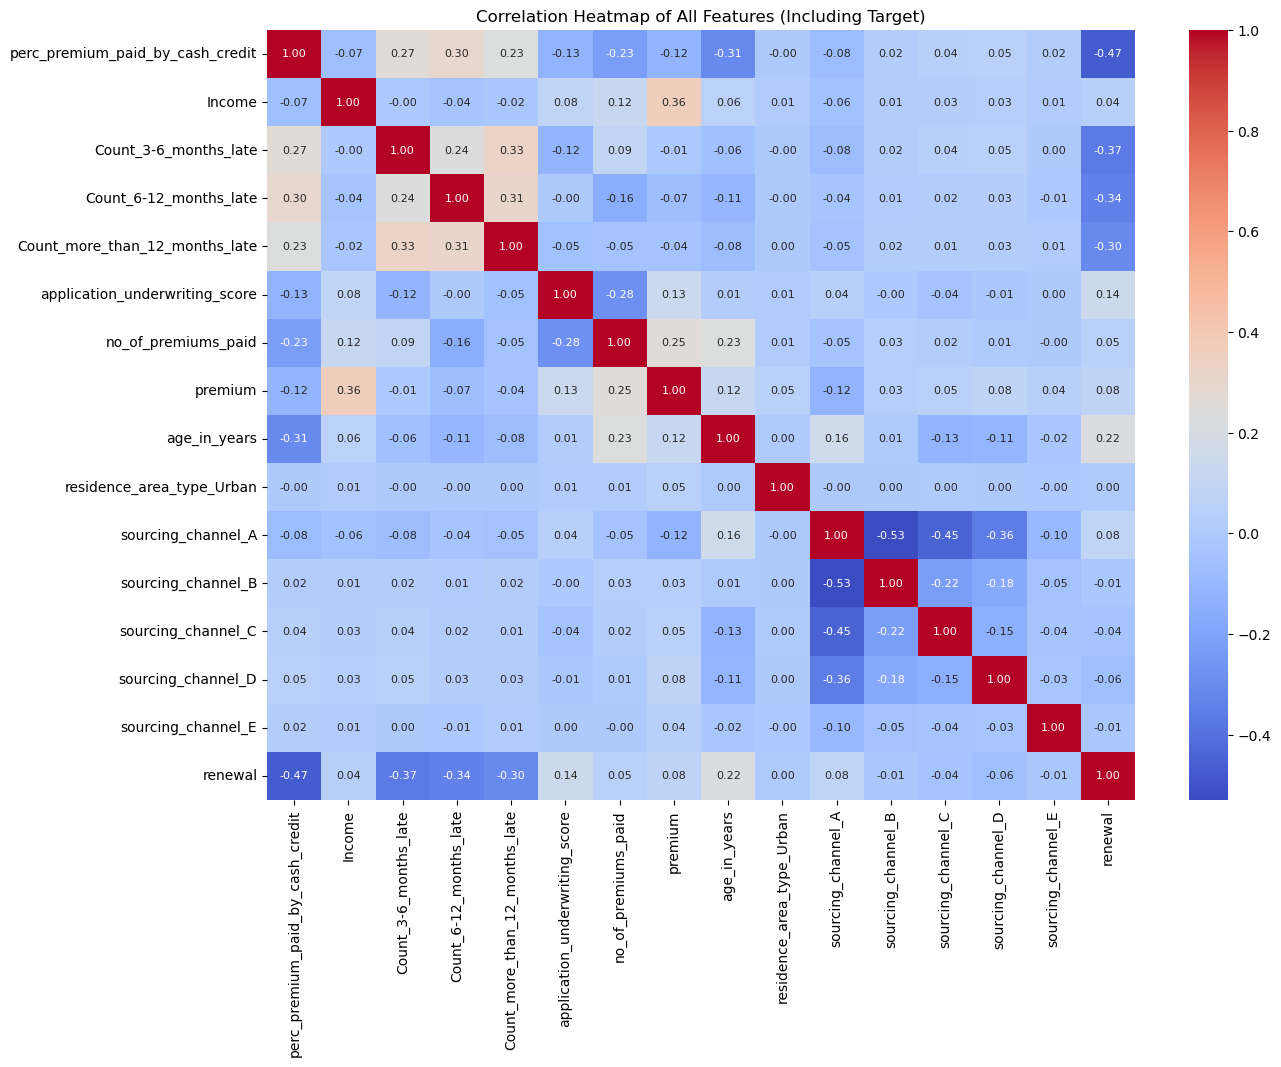

In [166]:
# Compute correlation matrix
corr_matrix = OG_proc_encoded_imputed_balanced.corr()

# Plot heatmap with correlation values
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,        # ✅ this adds correlation values
    fmt=".2f",         # format to 2 decimal places
    cbar=True,
    annot_kws={"size":8}  # smaller text size so it fits
)
plt.title("Correlation Heatmap of All Features (Including Target)")
plt.show()

In [170]:
OG_proc_stat_balanced.describe()

perc_premium_paid_by_cash_credit         Income  Count_3-6_months_late  \
count                     149710.000000  149710.000000          149710.000000   
mean                           0.446558      -0.035528               0.418344   
std                            1.109522       0.770439               1.511706   
min                           -0.938418      -0.372180              -0.359383   
25%                           -0.681634      -0.214884              -0.359383   
50%                            0.291755      -0.114399              -0.359383   
75%                            1.608517       0.040291               1.087590   
max                            2.047437     181.348112              18.451265   

       Count_6-12_months_late  Count_more_than_12_months_late  \
count           149710.000000                   149710.000000   
mean                 0.494737                        0.419503   
std                  1.949845                        1.837418   
min                 -0.179012                       -0.192199   
25%                 -0.179012                       -0.192199   
50%                 -0.179012                       -0.192199   
75%                 -0.179012                       -0.192199   
max                 38.789649                       35.082504   

       application_underwriting_score  no_of_premiums_paid        premium  \
count                   149710.000000        149710.000000  149710.000000   
mean                        -0.109002            -0.054419      -0.082148   
std                          1.046283             1.019562       0.923750   
min                         -9.790718            -1.714268      -1.034344   
25%                         -0.478550            -0.747272      -0.587612   
50%                          0.100288            -0.167075      -0.364247   
75%                          0.564783             0.492078       0.198724   
max                          1.124909             9.502880       5.219899   

        age_in_years  residence_area_type_Urban  sourcing_channel_A  \
count  149710.000000              149710.000000       149710.000000   
mean       -0.179646                  -0.002547           -0.063164   
std         0.942356                   0.991408            1.001611   
min        -2.144818                  -1.233454           -1.083838   
25%        -0.883466                  -1.233454           -1.083838   
50%        -0.252776                   0.810732            0.922647   
75%         0.447962                   0.810732            0.922647   
max         3.601344                   0.810732            0.922647   

       sourcing_channel_B  sourcing_channel_C  sourcing_channel_D  \
count       149710.000000       149710.000000       149710.000000   
mean             0.006546            0.036869            0.050717   
std              1.003089            1.033730            1.065875   
min             -0.510572           -0.421343           -0.323356   
25%             -0.510572           -0.421343           -0.323356   
50%             -0.510572           -0.421343           -0.323356   
75%             -0.510572           -0.421343           -0.323356   
max              1.958586            2.373365            3.092566   

       sourcing_channel_E        renewal  
count       149710.000000  149710.000000  
mean             0.009078       0.500000  
std              1.050087       0.500002  
min             -0.087665       0.000000  
25%             -0.087665       0.000000  
50%             -0.087665       0.500000  
75%             -0.087665       1.000000  
max             11.407082       1.000000

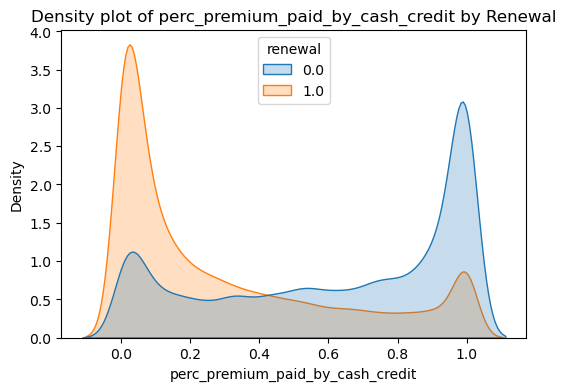

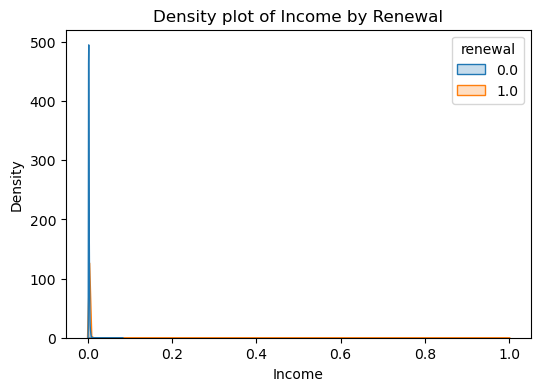

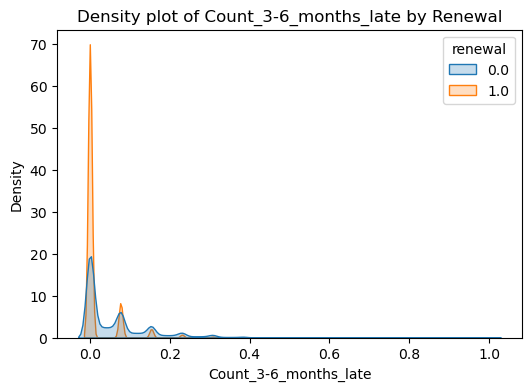

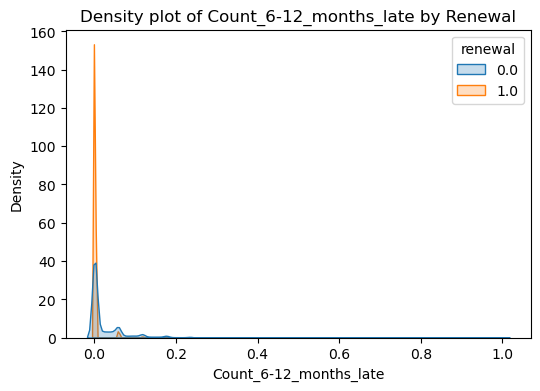

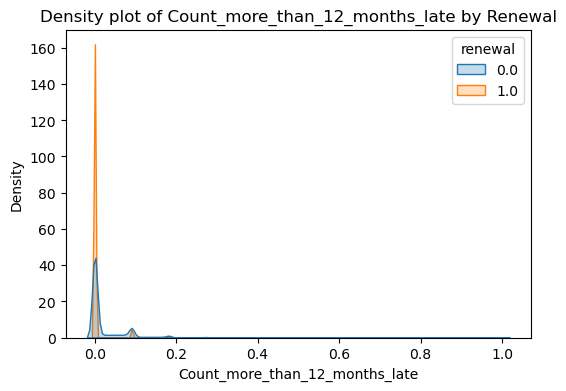

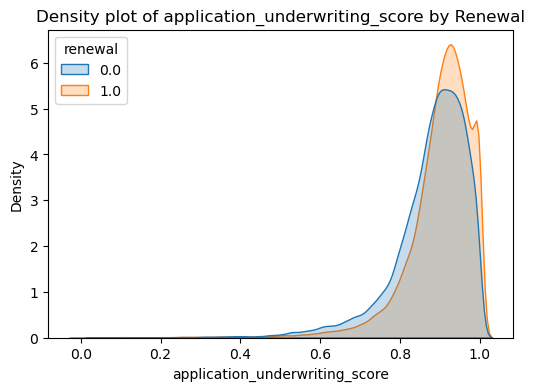

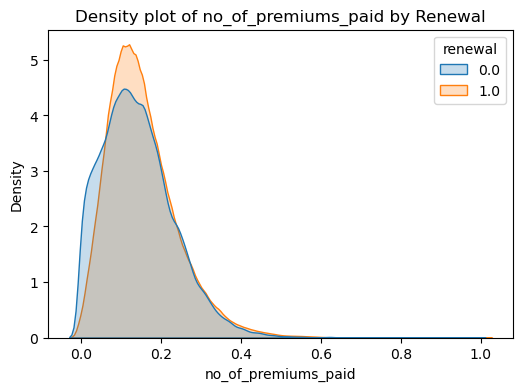

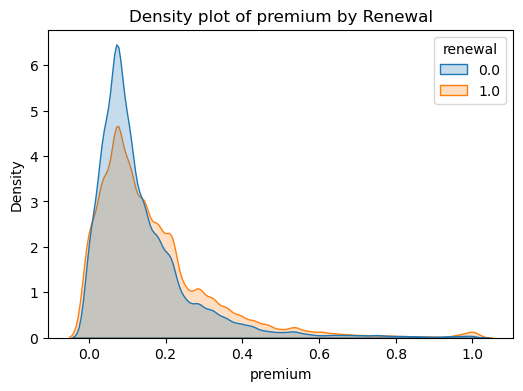

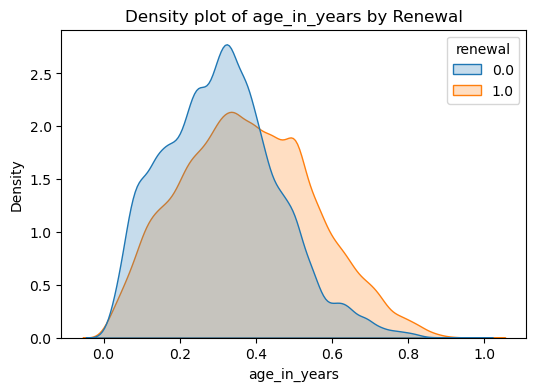

In [173]:
# Example density plot loop (standardized balanced dataset)
for col in num_cols:   # reuse your extracted continuous cols
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.kdeplot(data=OG_proc_norm_balanced, x=col, hue=target_col, fill=True, common_norm=False)
        plt.title(f"Density plot of {col} by Renewal")
        plt.show()


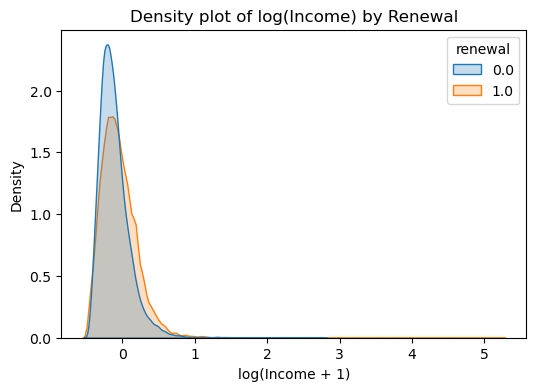

In [176]:
# Log-transform just for visualization
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=np.log1p(OG_proc_stat_balanced['Income']),   # log-transform only here
    hue=OG_proc_stat_balanced[target_col],
    fill=True, 
    common_norm=False
)
plt.title("Density plot of log(Income) by Renewal")
plt.xlabel("log(Income + 1)")
plt.show()


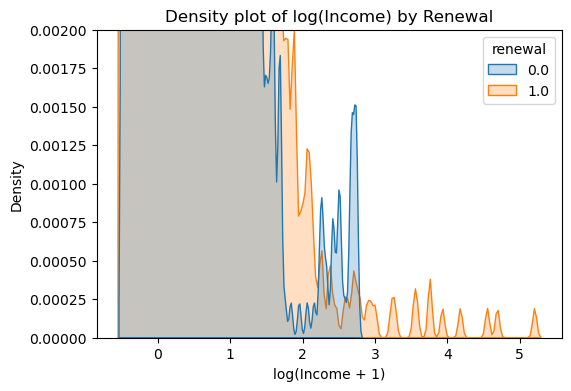

In [178]:
# Log-transform just for visualization (with capped y-axis)
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=np.log1p(OG_proc_stat_balanced['Income']),   # log-transform only here
    hue=OG_proc_stat_balanced[target_col],
    fill=True, 
    common_norm=False
)
plt.title("Density plot of log(Income) by Renewal")
plt.xlabel("log(Income + 1)")
plt.ylim(0, 0.002)   # cap density axis
plt.show()


### Feature Distributions by Renewal Status

We plotted the density distributions of key numerical features (premium, income, underwriting score, late payment counts, etc.) across renewal status (0 = Not Renewed, 1 = Renewed).

**Observations:**

- Most features show **substantial overlap** between renewed and not-renewed customers.  
- Feature-wise details:  
  - **Income**: Highly skewed; after log transformation, both groups look very similar with only slight uplift for renewals at the high end.  
  - **Premium** and **No. of Premiums Paid**: Very similar distributions, with only minor shifts.  
  - **Late Payment Counts** (`3–6`, `6–12`, `>12 months late`): Mostly zeros; higher counts are rare but carry signal (more lates → lower renewals).  
  - **Application Underwriting Score**: Overlapping distributions, with only a **slight shift** (renewed customers have marginally higher scores).  
  - **% Premium Paid by Cash/Credit**: Shows the clearest separation — renewed customers peak near low values, while not-renewed show a stronger peak near 1. This feature has **good discriminative power** compared to others.  
  - **Age**: Distribution is shifted — younger customers skew toward non-renewal, older customers toward renewal, though overlap is still present.

**Implications:**

- No single feature is a perfect discriminator.  
- Some features (e.g., `perc_premium_paid_by_cash_credit`, late-payment counts, age) provide stronger signal than others.  
- Renewal behavior is likely explained by **interactions across multiple features** rather than any one variable.  
- Linear models (e.g., Logistic Regression) may struggle to capture this overlap and non-linear behavior.

**Modeling Direction:**

- Use **tree-based ensemble methods** (Random Forest, XGBoost, LightGBM, CatBoost), which:  
  - Capture **non-linear relationships and interactions**.  
  - Are robust to **outliers and skewed distributions**.  
  - Can make use of rare but informative values (e.g., high late counts).  
- Bagging (Random Forest) for robustness; boosting (XGBoost/LightGBM/CatBoost) for higher predictive power.  
- Consider **ensembling** multiple models for additional stability.

**Conclusion:**  
Because most features overlap heavily, the predictive task requires models that can integrate **weak but complementary signals** across variables.  
We will rely on **tree-based ensembles**, as they are best suited for handling overlap, non-linearities, and outliers in this dataset.


### Final Model Decision
- Both **outlier analysis** and **EDA** point towards ensemble tree-based methods as the most appropriate.  
- Candidate models:  
  - **Random Forest (Bagging)** – stable and interpretable feature importance.  
  - **Boosting methods (XGBoost / LightGBM / CatBoost)** – strong accuracy and ability to capture subtle interactions.   

We will proceed with **ensemble tree-based models** as the primary modeling approach.


In [185]:
OG_proc_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   Income                            79853 non-null  float64
 2   Count_3-6_months_late             79853 non-null  float64
 3   Count_6-12_months_late            79853 non-null  float64
 4   Count_more_than_12_months_late    79853 non-null  float64
 5   application_underwriting_score    79853 non-null  float64
 6   no_of_premiums_paid               79853 non-null  float64
 7   premium                           79853 non-null  float64
 8   renewal                           79853 non-null  float64
 9   age_in_years                      79853 non-null  float64
 10  residence_area_type_Urban         79853 non-null  float64
 11  sourcing_channel_A                79853 non-null  float64
 12  sour

In [187]:
OG_proc_tree.shape

(79853, 16)

In [189]:
OG_proc_tree.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
renewal                             0
age_in_years                        0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
dtype: int64

Threshold 0.5 —  accuracy, precision, recall, f1, auc
0.9375743535157472 0.9413213744315311 0.9954578852448066 0.9676330227575236 0.8201123839422884


threshold  accuracy  precision  recall        f1     tp    fp  tn  fn
0       0.00  0.937387   0.937387     1.0  0.967681  14971  1000   0   0
1       0.01  0.937387   0.937387     1.0  0.967681  14971  1000   0   0
2       0.02  0.937387   0.937387     1.0  0.967681  14971  1000   0   0
3       0.03  0.937387   0.937387     1.0  0.967681  14971  1000   0   0
4       0.04  0.937387   0.937387     1.0  0.967681  14971  1000   0   0

Best F1 threshold: {'threshold': 0.39, 'accuracy': 0.9388892367415942, 'precision': 0.9393482765115841, 'recall': 0.9993320419477657, 'f1': 0.9684121949640754, 'tp': 14961.0, 'fp': 966.0, 'tn': 34.0, 'fn': 10.0}
Predicted counts at threshold 0.4 :
 1    15924
0       47
Name: count, dtype: int64


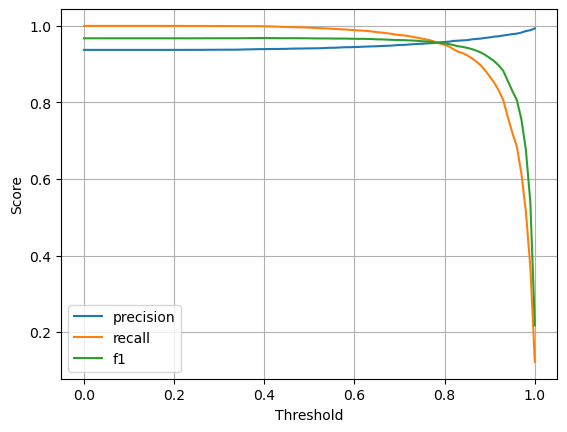

In [191]:
 from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, roc_auc_score
)
import numpy as np
import pandas as pd

# Settings: replace names with your variables
DF = OG_proc_tree              # raw tree-ready DF (imputed + encoded, no scaling)
TARGET = 'renewal'
RANDOM_STATE = 42

# 1) Train / test split (preserve original distribution in test)
X = DF.drop(columns=[TARGET])
y = DF[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Optionally: use a balanced training DF if you made one
# X_train_bal, y_train_bal = OG_proc_tree_balanced.drop(columns=[TARGET]), OG_proc_tree_balanced[TARGET]

# 2) Fit RandomForest (bagging baseline)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',   # helps with imbalance; remove if you used a balanced training DF
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf.fit(X_train, y_train)  # or rf.fit(X_train_bal, y_train_bal) if training on balanced data

# 3) Get probabilities on test set
y_proba = rf.predict_proba(X_test)[:, 1]

# 4) Evaluate at default threshold 0.5
y_pred_05 = (y_proba >= 0.5).astype(int)
print("Threshold 0.5 —  accuracy, precision, recall, f1, auc")
print(accuracy_score(y_test, y_pred_05),
      precision_score(y_test, y_pred_05),
      recall_score(y_test, y_pred_05),
      f1_score(y_test, y_pred_05),
      roc_auc_score(y_test, y_proba))

# 5) Sweep thresholds and show counts + metrics
thresholds = np.linspace(0.0, 1.0, 101)
results = []
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    results.append({
        'threshold': t,
        'accuracy': accuracy_score(y_test, y_pred_t),
        'precision': precision_score(y_test, y_pred_t, zero_division=0),
        'recall': recall_score(y_test, y_pred_t, zero_division=0),
        'f1': f1_score(y_test, y_pred_t, zero_division=0),
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    })

res_df = pd.DataFrame(results)
display(res_df.sort_values('threshold').head())   # quick peek

# 6) Pick a threshold of interest (example: maximize F1 or target recall)
best_f1_row = res_df.loc[res_df['f1'].idxmax()]
print("Best F1 threshold:", best_f1_row.to_dict())

# 7) If you want to see group counts after threshold (e.g., how many predicted renewal = 1)
chosen_t = 0.4   # example threshold you may pick after inspection
y_pred_chosen = (y_proba >= chosen_t).astype(int)
pred_counts = pd.Series(y_pred_chosen).value_counts()
print("Predicted counts at threshold", chosen_t, ":\n", pred_counts)

# 8) Optional: plot precision/recall/f1 vs threshold (requires matplotlib)
import matplotlib.pyplot as plt
plt.plot(res_df['threshold'], res_df['precision'], label='precision')
plt.plot(res_df['threshold'], res_df['recall'], label='recall')
plt.plot(res_df['threshold'], res_df['f1'], label='f1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.legend(); plt.grid()
plt.show()


In [199]:
OG_proc_encoded_imputed_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149710 entries, 0 to 149709
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   perc_premium_paid_by_cash_credit  149710 non-null  float64
 1   Income                            149710 non-null  float64
 2   Count_3-6_months_late             149710 non-null  float64
 3   Count_6-12_months_late            149710 non-null  float64
 4   Count_more_than_12_months_late    149710 non-null  float64
 5   application_underwriting_score    149710 non-null  float64
 6   no_of_premiums_paid               149710 non-null  float64
 7   premium                           149710 non-null  float64
 8   age_in_years                      149710 non-null  float64
 9   residence_area_type_Urban         149710 non-null  float64
 10  sourcing_channel_A                149710 non-null  float64
 11  sourcing_channel_B                149710 non-null  f

Train shape: (63882, 9) Test shape: (15971, 9)
Train class distribution:
 renewal
1    0.937416
0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1    0.937387
0    0.062613
Name: proportion, dtype: float64

Obtaining out-of-fold predicted probabilities with SMOTE (this may take a while)...


threshold  accuracy  precision    recall        f1
0       0.01  0.937416   0.937416  1.000000  0.967697
1       0.02  0.937416   0.937416  1.000000  0.967697
2       0.03  0.937400   0.937415  0.999983  0.967689
3       0.04  0.937400   0.937415  0.999983  0.967689
4       0.05  0.937432   0.937444  0.999983  0.967704
5       0.06  0.937385   0.937469  0.999900  0.967678
6       0.07  0.937416   0.937498  0.999900  0.967694
7       0.08  0.937416   0.937512  0.999883  0.967693
8       0.09  0.937447   0.937555  0.999866  0.967709
9       0.10  0.937416   0.937580  0.999800  0.967691

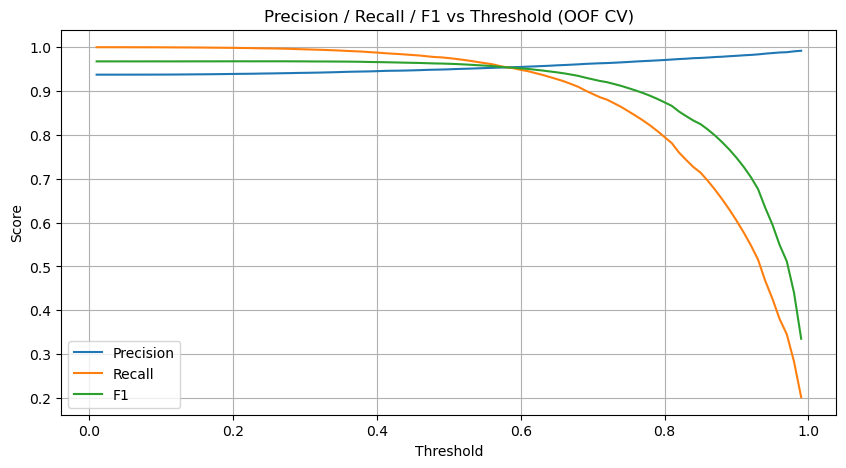


Best threshold (by OOF F1): 0.200
Scores at best threshold (OOF CV):


accuracy     0.937917
precision    0.939055
recall       0.998581
f1           0.967903
Name: 19, dtype: float64


Retraining RandomForest on full training set with SMOTE...

--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.8053469374123303
              precision    recall  f1-score   support

           0     0.3523    0.2040    0.2584      1000
           1     0.9483    0.9750    0.9614     14971

    accuracy                         0.9267     15971
   macro avg     0.6503    0.5895    0.6099     15971
weighted avg     0.9110    0.9267    0.9174     15971

Confusion matrix (rows: true, cols: pred):
[[  204   796]
 [  375 14596]]

--- Test metrics at chosen threshold 0.200 ---
ROC AUC (same): 0.8053469374123303
              precision    recall  f1-score   support

           0     0.5306    0.0260    0.0496      1000
           1     0.9388    0.9985    0.9677     14971

    accuracy                         0.9376     15971
   macro avg     0.7347    0.5122    0.5086     15971
weighted avg     0.9133    0.9376    0.9102     15971

Confusion matrix (rows: true, cols: pred):
[[   26   9

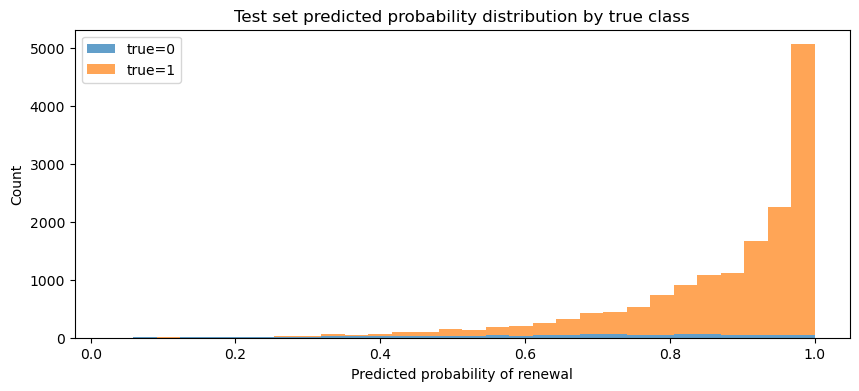

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)

# --- NEW IMPORTS ---
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
DF_RF = OG_proc_imputed_numerical.copy()        # dataframe for tree experiments
TARGET_COL_RF = target_col            # e.g., 'renewal'
RANDOM_STATE_RF = 42
CV_FOLDS_RF = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_rf = DF_RF.drop(columns=[TARGET_COL_RF])
y_rf = DF_RF[TARGET_COL_RF]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.20, stratify=y_rf, random_state=RANDOM_STATE_RF
)

print("Train shape:", X_rf_train.shape, "Test shape:", X_rf_test.shape)
print("Train class distribution:\n", y_rf_train.value_counts(normalize=True))
print("Test class distribution:\n", y_rf_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & OOF probabilities via cross_val_predict
# --- MODIFIED SECTION ---
# Create a pipeline that first applies SMOTE and then trains the classifier
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',  # Keep this for an extra layer of handling
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])

cv_splitter = StratifiedKFold(n_splits=CV_FOLDS_RF, shuffle=True, random_state=RANDOM_STATE_RF)

# Get out-of-fold probabilities for the training set (used for threshold tuning)
# Use the new pipeline in cross_val_predict
print("\nObtaining out-of-fold predicted probabilities with SMOTE (this may take a while)...")
y_rf_oof_proba = cross_val_predict(
    smote_pipeline, X_rf_train, y_rf_train, cv=cv_splitter, method="predict_proba", n_jobs=-1
)[:, 1]
# --- END MODIFIED SECTION ---

# Quick sanity: OOF proba length should match train size
assert len(y_rf_oof_proba) == X_rf_train.shape[0]

# -----------------------------
# 3) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_rf_oof_pred_t = (y_rf_oof_proba >= t).astype(int)
    prec = precision_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    rec = recall_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    f1 = f1_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_rf_train, y_rf_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV (you can change criterion)
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 4) Retrain on full training set and evaluate on test set
# --- MODIFIED SECTION ---
print("\nRetraining RandomForest on full training set with SMOTE...")
# Use the same pipeline for the final model training
rf_final = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])
rf_final.fit(X_rf_train, y_rf_train)
# --- END MODIFIED SECTION ---

# Predict probabilities on test set
y_rf_test_proba = rf_final.predict_proba(X_rf_test)[:, 1]
y_rf_test_pred_default = (y_rf_test_proba >= 0.5).astype(int)
y_rf_test_pred_best = (y_rf_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_rf_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 5) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_rf_test_proba[y_rf_test==0], y_rf_test_proba[y_rf_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

In [213]:
OG_proc_stat.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
renewal                             0
age_in_years                        0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
dtype: int64

Full train shape: (63882, 15) Test shape: (15971, 15)
Train class distribution (orig):
renewal
1.0    0.937416
0.0    0.062584
Name: proportion, dtype: float64

RESAMPLER: SMOTE
- original train class counts:
renewal
1.0    59884
0.0     3998
Name: count, dtype: int64

Running cross_val_predict to obtain OOF probabilities (may take a while)...
Best OOF threshold by F1 = 0.130


accuracy  precision    recall        f1
12  0.937713   0.938505  0.999015  0.967815

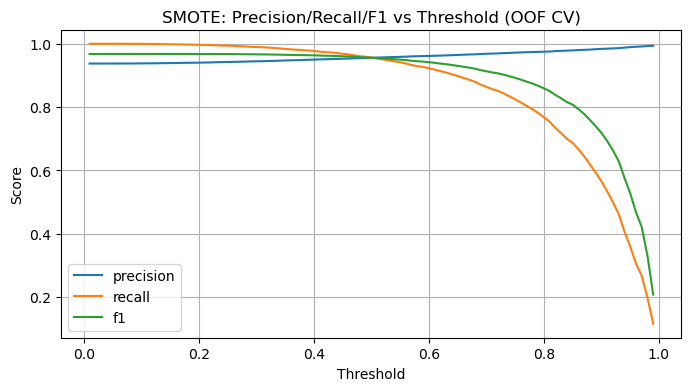

Fitting pipeline on the full training set (resampling + RF)...
After resampling (train) class distribution:
renewal
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

--- Test metrics for SMOTE at default threshold 0.5 ---
ROC AUC: 0.817848874490682
              precision    recall  f1-score   support

         0.0     0.3365    0.3230    0.3296      1000
         1.0     0.9549    0.9575    0.9562     14971

    accuracy                         0.9177     15971
   macro avg     0.6457    0.6402    0.6429     15971
weighted avg     0.9162    0.9177    0.9169     15971

Confusion matrix (rows=true, cols=pred):
[[  323   677]
 [  637 14334]]

--- Test metrics for SMOTE at chosen threshold 0.130 ---
ROC AUC (same): 0.817848874490682
              precision    recall  f1-score   support

         0.0     0.5758    0.0190    0.0368      1000
         1.0     0.9384    0.9991    0.9678     14971

    accuracy                         0.9377     15971
   macro avg     0.7571    0.5090   

accuracy  precision    recall        f1
13  0.937682   0.938283  0.999249  0.967807

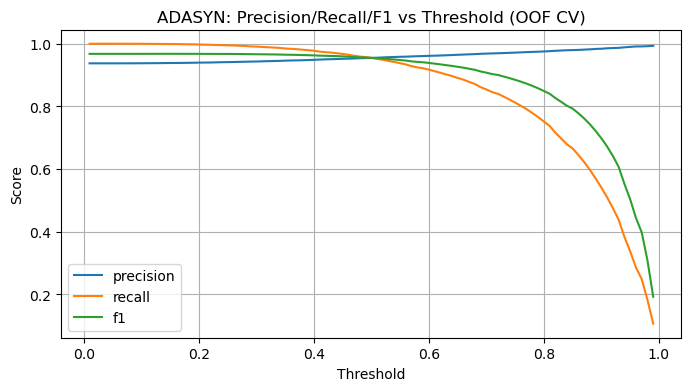

Fitting pipeline on the full training set (resampling + RF)...
After resampling (train) class distribution:
renewal
1.0    0.500242
0.0    0.499758
Name: proportion, dtype: float64

--- Test metrics for ADASYN at default threshold 0.5 ---
ROC AUC: 0.8142842161512256
              precision    recall  f1-score   support

         0.0     0.3153    0.3030    0.3090      1000
         1.0     0.9536    0.9560    0.9548     14971

    accuracy                         0.9152     15971
   macro avg     0.6344    0.6295    0.6319     15971
weighted avg     0.9136    0.9152    0.9144     15971

Confusion matrix (rows=true, cols=pred):
[[  303   697]
 [  658 14313]]

--- Test metrics for ADASYN at chosen threshold 0.140 ---
ROC AUC (same): 0.8142842161512256
              precision    recall  f1-score   support

         0.0     0.5455    0.0120    0.0235      1000
         1.0     0.9381    0.9993    0.9677     14971

    accuracy                         0.9375     15971
   macro avg     0.741

accuracy  precision    recall        f1
10   0.93787   0.938322  0.999416  0.967906

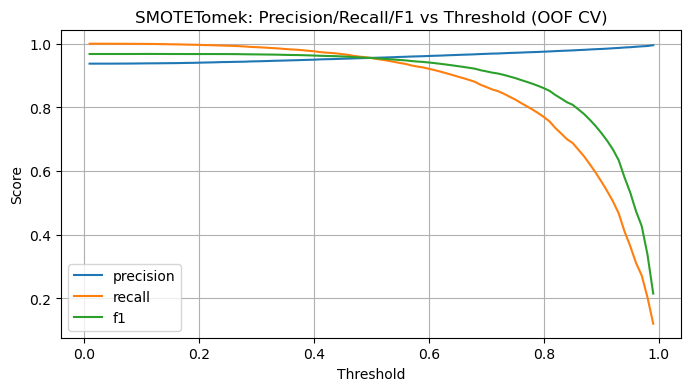

Fitting pipeline on the full training set (resampling + RF)...
After resampling (train) class distribution:
renewal
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

--- Test metrics for SMOTETomek at default threshold 0.5 ---
ROC AUC: 0.816796406385679
              precision    recall  f1-score   support

         0.0     0.3368    0.3270    0.3318      1000
         1.0     0.9551    0.9570    0.9561     14971

    accuracy                         0.9175     15971
   macro avg     0.6459    0.6420    0.6439     15971
weighted avg     0.9164    0.9175    0.9170     15971

Confusion matrix (rows=true, cols=pred):
[[  327   673]
 [  644 14327]]

--- Test metrics for SMOTETomek at chosen threshold 0.110 ---
ROC AUC (same): 0.816796406385679
              precision    recall  f1-score   support

         0.0     0.6250    0.0100    0.0197      1000
         1.0     0.9380    0.9996    0.9678     14971

    accuracy                         0.9376     15971
   macro avg     0.7815   

accuracy  precision   recall       f1
1  0.938199   0.939693  0.99813  0.96803

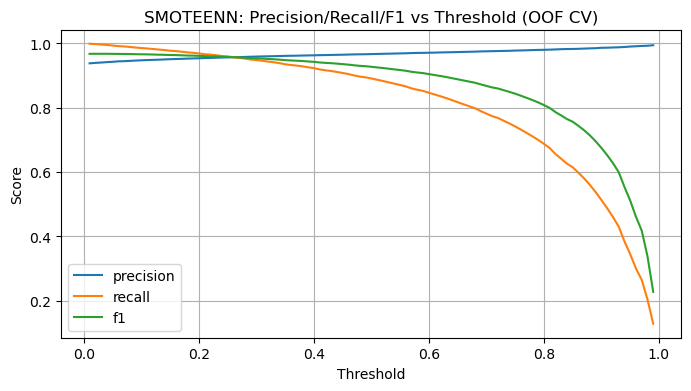

Fitting pipeline on the full training set (resampling + RF)...
After resampling (train) class distribution:
renewal
0.0    0.557667
1.0    0.442333
Name: proportion, dtype: float64

--- Test metrics for SMOTEENN at default threshold 0.5 ---
ROC AUC: 0.8289412196914034
              precision    recall  f1-score   support

         0.0     0.2524    0.5420    0.3445      1000
         1.0     0.9669    0.8928    0.9284     14971

    accuracy                         0.8708     15971
   macro avg     0.6097    0.7174    0.6364     15971
weighted avg     0.9221    0.8708    0.8918     15971

Confusion matrix (rows=true, cols=pred):
[[  542   458]
 [ 1605 13366]]

--- Test metrics for SMOTEENN at chosen threshold 0.020 ---
ROC AUC (same): 0.8289412196914034
              precision    recall  f1-score   support

         0.0     0.5152    0.0340    0.0638      1000
         1.0     0.9393    0.9979    0.9677     14971

    accuracy                         0.9375     15971
   macro avg     0

resampler  best_threshold_oof    oof_f1  test_roc_auc  \
0       SMOTE                0.13  0.967815      0.817849   
1      ADASYN                0.14  0.967807      0.814284   
2  SMOTETomek                0.11  0.967906      0.816796   
3    SMOTEENN                0.02  0.968030      0.828941   

   test_precision_class0  test_recall_class0  test_f1_class0  
0               0.575758               0.019        0.036786  
1               0.545455               0.012        0.023483  
2               0.625000               0.010        0.019685  
3               0.515152               0.034        0.063790

In [215]:
# Try multiple resampling strategies (SMOTE, ADASYN, SMOTETomek, SMOTEENN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn's Pipeline (works with resampler)

# -----------------------------
# Config (unique variable names)
# -----------------------------
DF_RES = OG_proc_stat.copy()   # source dataset (imputed+encoded; NOT globally balanced)
TARGET_COL_RES = target_col               # 'renewal'
RND = 42
CV_FOLDS = 5

# Resamplers to try
resamplers = {
    "SMOTE": SMOTE(random_state=RND),
    "ADASYN": ADASYN(random_state=RND),
    "SMOTETomek": SMOTETomek(random_state=RND),
    "SMOTEENN": SMOTEENN(random_state=RND)
}

# Model config
rf_params = dict(n_estimators=300, max_depth=None, random_state=RND, n_jobs=-1)

# -----------------------------
# Train / Test split (keep test untouched)
# -----------------------------
X_all = DF_RES.drop(columns=[TARGET_COL_RES])
y_all = DF_RES[TARGET_COL_RES]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_all, y_all, test_size=0.20, stratify=y_all, random_state=RND
)

print("Full train shape:", X_train_full.shape, "Test shape:", X_test.shape)
print("Train class distribution (orig):")
print(y_train_full.value_counts(normalize=True))
print()

# Storage for summary results
summary_rows = []

# Loop resamplers
for name, res in resamplers.items():
    print("="*80)
    print(f"RESAMPLER: {name}")
    print("- original train class counts:")
    print(y_train_full.value_counts())
    print()

    # Build pipeline (resampler -> RF)
    pipeline = ImbPipeline([
        ("resampler", res),
        ("rf", RandomForestClassifier(**rf_params))
    ])

    # -----------------------------
    # OOF CV probabilities (resampling happens inside each fold)
    # -----------------------------
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RND)
    print("Running cross_val_predict to obtain OOF probabilities (may take a while)...")
    # cross_val_predict will fit pipeline on each training fold (apply resampling on that fold)
    y_oof_proba = cross_val_predict(
        pipeline, X_train_full, y_train_full, cv=cv, method="predict_proba", n_jobs=-1
    )[:, 1]

    assert len(y_oof_proba) == X_train_full.shape[0]

    # -----------------------------
    # Threshold sweep (on OOF)
    # -----------------------------
    thresholds = np.linspace(0.01, 0.99, 99)
    sweep = []
    for t in thresholds:
        y_oof_pred_t = (y_oof_proba >= t).astype(int)
        prec = precision_score(y_train_full, y_oof_pred_t, zero_division=0)
        rec = recall_score(y_train_full, y_oof_pred_t, zero_division=0)
        f1 = f1_score(y_train_full, y_oof_pred_t, zero_division=0)
        acc = accuracy_score(y_train_full, y_oof_pred_t)
        sweep.append((t, acc, prec, rec, f1))
    sweep_df = pd.DataFrame(sweep, columns=['threshold','accuracy','precision','recall','f1'])

    # pick best threshold by F1 on OOF
    best_idx = sweep_df['f1'].idxmax()
    best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
    best_scores_oof = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]

    print(f"Best OOF threshold by F1 = {best_threshold:.3f}")
    display(best_scores_oof.to_frame().T)

    # Optional: plot PR/F1 vs threshold for quick inspection
    plt.figure(figsize=(8,4))
    plt.plot(sweep_df['threshold'], sweep_df['precision'], label='precision')
    plt.plot(sweep_df['threshold'], sweep_df['recall'], label='recall')
    plt.plot(sweep_df['threshold'], sweep_df['f1'], label='f1')
    plt.title(f"{name}: Precision/Recall/F1 vs Threshold (OOF CV)")
    plt.xlabel("Threshold"); plt.ylabel("Score")
    plt.legend(); plt.grid(); plt.show()

    # -----------------------------
    # Fit pipeline on full training set (resampling applied on full train inside pipeline.fit)
    # -----------------------------
    print("Fitting pipeline on the full training set (resampling + RF)...")
    pipeline.fit(X_train_full, y_train_full)

    # If you want to inspect the resampled distribution used to train final RF:
    try:
        # manual resample with same resampler to inspect counts
        X_res_full, y_res_full = res.fit_resample(X_train_full, y_train_full)
        print("After resampling (train) class distribution:")
        print(pd.Series(y_res_full).value_counts(normalize=True))
    except Exception as e:
        print("Could not show after-resampling distribution (resampler may not expose fit_resample).", e)
    print()

    # -----------------------------
    # Evaluate on untouched test set
    # -----------------------------
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    # metrics at default 0.5
    y_test_pred_05 = (y_test_proba >= 0.5).astype(int)
    y_test_pred_best = (y_test_proba >= best_threshold).astype(int)

    print(f"--- Test metrics for {name} at default threshold 0.5 ---")
    print("ROC AUC:", roc_auc_score(y_test, y_test_proba))
    print(classification_report(y_test, y_test_pred_05, digits=4))
    print("Confusion matrix (rows=true, cols=pred):")
    print(confusion_matrix(y_test, y_test_pred_05))
    print()

    print(f"--- Test metrics for {name} at chosen threshold {best_threshold:.3f} ---")
    print("ROC AUC (same):", roc_auc_score(y_test, y_test_proba))
    print(classification_report(y_test, y_test_pred_best, digits=4))
    print("Confusion matrix (rows=true, cols=pred):")
    print(confusion_matrix(y_test, y_test_pred_best))
    print()

    # show predicted positive counts at best threshold
    pred_counts = pd.Series(y_test_pred_best).value_counts().sort_index()
    print(f"Predicted counts at threshold {best_threshold:.3f}:")
    print(pred_counts.to_string())
    print()

    # store summary
    summary_rows.append({
        "resampler": name,
        "best_threshold_oof": best_threshold,
        "oof_f1": float(best_scores_oof['f1']),
        "test_roc_auc": float(roc_auc_score(y_test, y_test_proba)),
        "test_precision_class0": precision_score(y_test, y_test_pred_best, pos_label=0, zero_division=0),
        "test_recall_class0": recall_score(y_test, y_test_pred_best, pos_label=0, zero_division=0),
        "test_f1_class0": f1_score(y_test, y_test_pred_best, pos_label=0, zero_division=0)
    })

# -----------------------------
# Summary table across resamplers
# -----------------------------
summary_df = pd.DataFrame(summary_rows)
print("\n\nSummary across resamplers (best-threshold OOF + test metrics for chosen threshold):")
display(summary_df)


In [217]:
# XGBoost pipeline with threshold sweep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)
from xgboost import XGBClassifier

# -----------------------------
# Config / dataset
# -----------------------------
DF_XGB = OG_proc_encoded_imputed.copy()   # dataset
TARGET_COL_XGB = target_col
RANDOM_STATE_XGB = 42
CV_FOLDS_XGB = 5

X_xgb = DF_XGB.drop(columns=[TARGET_COL_XGB])
y_xgb = DF_XGB[TARGET_COL_XGB]

# Train-test split
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(
    X_xgb, y_xgb, test_size=0.2, stratify=y_xgb, random_state=RANDOM_STATE_XGB
)

# -----------------------------
# 1) Cross-validated OOF predictions
# -----------------------------
xgb_model_cv = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_xgb_train.value_counts()[0] / y_xgb_train.value_counts()[1]),  # balance classes
    random_state=RANDOM_STATE_XGB,
    n_jobs=-1,
    eval_metric='logloss',
    use_label_encoder=False
)

cv_splitter = StratifiedKFold(n_splits=CV_FOLDS_XGB, shuffle=True, random_state=RANDOM_STATE_XGB)

print("Obtaining OOF probabilities with XGBoost...")
y_xgb_oof_proba = cross_val_predict(
    xgb_model_cv, X_xgb_train, y_xgb_train,
    cv=cv_splitter, method="predict_proba", n_jobs=-1
)[:, 1]

# -----------------------------
# 2) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_pred_t = (y_xgb_oof_proba >= t).astype(int)
    prec = precision_score(y_xgb_train, y_pred_t, zero_division=0)
    rec = recall_score(y_xgb_train, y_pred_t, zero_division=0)
    f1 = f1_score(y_xgb_train, y_pred_t, zero_division=0)
    acc = accuracy_score(y_xgb_train, y_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df_xgb = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])

# Pick best threshold
best_idx_xgb = sweep_df_xgb['f1'].idxmax()
best_threshold_xgb = float(sweep_df_xgb.loc[best_idx_xgb, 'threshold'])
best_scores_xgb = sweep_df_xgb.loc[best_idx_xgb, ['accuracy','precision','recall','f1']]

print(f"\nBest threshold (by OOF F1): {best_threshold_xgb:.3f}")
print("Scores at best threshold (OOF CV):")
print(best_scores_xgb)

# -----------------------------
# 3) Retrain XGBoost on full training set
# -----------------------------
xgb_model_final = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_xgb_train.value_counts()[0] / y_xgb_train.value_counts()[1]),
    random_state=RANDOM_STATE_XGB,
    n_jobs=-1,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model_final.fit(X_xgb_train, y_xgb_train)

# Test predictions
y_xgb_test_proba = xgb_model_final.predict_proba(X_xgb_test)[:, 1]
y_xgb_test_pred_default = (y_xgb_test_proba >= 0.5).astype(int)
y_xgb_test_pred_best = (y_xgb_test_proba >= best_threshold_xgb).astype(int)

# -----------------------------
# 4) Evaluation
# -----------------------------
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_xgb_test, y_xgb_test_proba))
print(classification_report(y_xgb_test, y_xgb_test_pred_default, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_xgb_test, y_xgb_test_pred_default))

print(f"\n--- Test metrics at chosen threshold {best_threshold_xgb:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_xgb_test, y_xgb_test_proba))
print(classification_report(y_xgb_test, y_xgb_test_pred_best, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_xgb_test, y_xgb_test_pred_best))


Obtaining OOF probabilities with XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


Best threshold (by OOF F1): 0.050
Scores at best threshold (OOF CV):
accuracy     0.939122
precision    0.941441
recall       0.997078
f1           0.968461
Name: 4, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.8378502104067864
              precision    recall  f1-score   support

         0.0     0.2177    0.6620    0.3276      1000
         1.0     0.9739    0.8411    0.9026     14971

    accuracy                         0.8299     15971
   macro avg     0.5958    0.7515    0.6151     15971
weighted avg     0.9265    0.8299    0.8666     15971

Confusion matrix:
 [[  662   338]
 [ 2379 12592]]

--- Test metrics at chosen threshold 0.050 ---
ROC AUC (same): 0.8378502104067864
              precision    recall  f1-score   support

         0.0     0.5357    0.0600    0.1079      1000
         1.0     0.9407    0.9965    0.9678     14971

    accuracy                         0.9379     15971
   macro avg     0.7382    0.5283    0.5379     15971
weighted avg     0.9154    0.9379    0.9140     15971

Confusion matrix:
 [[   60   940]
 [   52 14919]]


In [221]:
# ============================
# Recall-Optimized Bagging (RandomForest + SMOTE inside CV)
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# -----------------------------
# Config
# -----------------------------
DF_OPT = OG_proc_encoded_imputed.copy()   # dataset to use
TARGET_OPT = target_col                   # your target column, e.g. "renewal"
RND_OPT = 42                              # ✅ random state defined
CV_FOLDS_OPT = 5

# -----------------------------
# 1) Train / Test split
# -----------------------------
X_opt = DF_OPT.drop(columns=[TARGET_OPT])
y_opt = DF_OPT[TARGET_OPT]

X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(
    X_opt, y_opt, test_size=0.20, stratify=y_opt, random_state=RND_OPT
)

print("Train shape:", X_opt_train.shape, "Test shape:", X_opt_test.shape)
print("Train distribution:\n", y_opt_train.value_counts(normalize=True))

# -----------------------------
# 2) Pipeline: SMOTE + RandomForest
# -----------------------------
pipeline_opt = ImbPipeline([
    ("smote", SMOTE(random_state=RND_OPT)),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        random_state=RND_OPT,
        n_jobs=-1
    ))
])

cv = StratifiedKFold(n_splits=CV_FOLDS_OPT, shuffle=True, random_state=RND_OPT)

# OOF predicted probabilities
y_oof_proba_opt = cross_val_predict(
    pipeline_opt, X_opt_train, y_opt_train,
    cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# -----------------------------
# 3) Threshold sweep (maximize recall for class 0)
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
rows = []
for t in thresholds:
    y_oof_pred_t = (y_oof_proba_opt >= t).astype(int)
    rec0 = recall_score(y_opt_train, y_oof_pred_t, pos_label=0)
    prec0 = precision_score(y_opt_train, y_oof_pred_t, pos_label=0, zero_division=0)
    f1_0 = f1_score(y_opt_train, y_oof_pred_t, pos_label=0, zero_division=0)
    rows.append((t, rec0, prec0, f1_0))

sweep_df_opt = pd.DataFrame(rows, columns=["threshold", "recall_class0", "precision_class0", "f1_class0"])
best_idx = sweep_df_opt['recall_class0'].idxmax()
best_recall = sweep_df_opt.loc[best_idx, "recall_class0"]
best_threshold = sweep_df_opt.loc[best_idx, "threshold"]

print(f"\nBest threshold (by recall for class 0): {best_threshold:.3f}, Recall0 = {best_recall:.3f}")
display(sweep_df_opt.sort_values("recall_class0", ascending=False).head(10))

# -----------------------------
# 4) Retrain and evaluate on test
# -----------------------------
pipeline_opt.fit(X_opt_train, y_opt_train)
y_test_proba_opt = pipeline_opt.predict_proba(X_opt_test)[:, 1]
y_test_pred_best = (y_test_proba_opt >= best_threshold).astype(int)

print("\n--- Test metrics at recall-optimized threshold ---")
print("ROC AUC:", roc_auc_score(y_opt_test, y_test_proba_opt))
print(classification_report(y_opt_test, y_test_pred_best, digits=4))
print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_opt_test, y_test_pred_best))


Train shape: (63882, 15) Test shape: (15971, 15)
Train distribution:
 renewal
1.0    0.937416
0.0    0.062584
Name: proportion, dtype: float64

Best threshold (by recall for class 0): 0.990, Recall0 = 0.960


threshold  recall_class0  precision_class0  f1_class0
98       0.99       0.959980          0.083070   0.152908
97       0.98       0.929965          0.095399   0.173047
96       0.97       0.897199          0.105896   0.189433
95       0.96       0.875188          0.112486   0.199351
94       0.95       0.845923          0.122399   0.213854
93       0.94       0.815908          0.131985   0.227214
92       0.93       0.780640          0.145197   0.244852
91       0.92       0.756878          0.154830   0.257072
90       0.91       0.733117          0.164358   0.268517
89       0.90       0.709605          0.173644   0.279013


--- Test metrics at recall-optimized threshold ---
ROC AUC: 0.8158749916505244
              precision    recall  f1-score   support

         0.0     0.0832    0.9580    0.1530      1000
         1.0     0.9906    0.2944    0.4539     14971

    accuracy                         0.3360     15971
   macro avg     0.5369    0.6262    0.3035     15971
weighted avg     0.9337    0.3360    0.4351     15971

Confusion matrix (rows=true, cols=pred):
[[  958    42]
 [10563  4408]]


In [223]:
# Option A: OOF threshold sweep maximizing recall for class 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Config (unique names)
DF_OPT = OG_proc_encoded_imputed.copy()
TARGET_OPT = target_col
RND_OPT = 42
CV_FOLDS_OPT = 5

# Train/test split (test untouched)
X_opt = DF_OPT.drop(columns=[TARGET_OPT])
y_opt = DF_OPT[TARGET_OPT]
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(
    X_opt, y_opt, test_size=0.20, stratify=y_opt, random_state=RND_OPT
)

# Pipeline: SMOTE (inside fold) + RandomForest
pipeline_opt = ImbPipeline([
    ("smote", SMOTE(random_state=RND_OPT)),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=RND_OPT, n_jobs=-1))
])

cv = StratifiedKFold(n_splits=CV_FOLDS_OPT, shuffle=True, random_state=RND_OPT)

# Get OOF probabilities (resampling in fold)
print("Computing OOF predicted probabilities (may take a while)...")
y_oof_proba_opt = cross_val_predict(pipeline_opt, X_opt_train, y_opt_train,
                                    cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# Threshold sweep: choose threshold maximizing recall for class 0
thresholds = np.linspace(0.01, 0.99, 99)
rows = []
for t in thresholds:
    y_oof_pred_t = (y_oof_proba_opt >= t).astype(int)
    # recall for class 0 : use pos_label=0
    rec0 = recall_score(y_opt_train, y_oof_pred_t, pos_label=0)
    prec0 = precision_score(y_opt_train, y_oof_pred_t, pos_label=0, zero_division=0)
    f1_0 = f1_score(y_opt_train, y_oof_pred_t, pos_label=0, zero_division=0)
    rows.append((t, rec0, prec0, f1_0))

sweep_df_opt = pd.DataFrame(rows, columns=["threshold", "recall_class0", "precision_class0", "f1_class0"])
# Show top thresholds by recall_class0
display(sweep_df_opt.sort_values("recall_class0", ascending=False).head(10))

# pick threshold that gives max recall_class0 (tie-breaker: use highest f1_class0)
best_idx = sweep_df_opt['recall_class0'].idxmax()
best_recall = float(sweep_df_opt.loc[best_idx, 'recall_class0'])
# If multiple thresholds have same recall, pick the one with best f1_class0
best_candidates = sweep_df_opt[sweep_df_opt['recall_class0'] == best_recall]
best_row = best_candidates.loc[best_candidates['f1_class0'].idxmax()]
best_threshold = float(best_row['threshold'])
print(f"Chosen threshold maximizing recall(class0) = {best_threshold:.3f}  (recall0={best_recall:.3f})")

# Retrain pipeline on full training set and evaluate on test set
pipeline_opt.fit(X_opt_train, y_opt_train)
y_test_proba_opt = pipeline_opt.predict_proba(X_opt_test)[:, 1]
y_test_pred_best = (y_test_proba_opt >= best_threshold).astype(int)

print("\nTest set metrics at chosen threshold (maximize recall for class0):")
print(classification_report(y_opt_test, y_test_pred_best, digits=4))
print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_opt_test, y_test_pred_best))
print("ROC AUC:", roc_auc_score(y_opt_test, y_test_proba_opt))


Computing OOF predicted probabilities (may take a while)...


threshold  recall_class0  precision_class0  f1_class0
98       0.99       0.959980          0.083070   0.152908
97       0.98       0.929965          0.095399   0.173047
96       0.97       0.897199          0.105896   0.189433
95       0.96       0.875188          0.112486   0.199351
94       0.95       0.845923          0.122399   0.213854
93       0.94       0.815908          0.131985   0.227214
92       0.93       0.780640          0.145197   0.244852
91       0.92       0.756878          0.154830   0.257072
90       0.91       0.733117          0.164358   0.268517
89       0.90       0.709605          0.173644   0.279013

Chosen threshold maximizing recall(class0) = 0.990  (recall0=0.960)

Test set metrics at chosen threshold (maximize recall for class0):
              precision    recall  f1-score   support

         0.0     0.0832    0.9580    0.1530      1000
         1.0     0.9906    0.2944    0.4539     14971

    accuracy                         0.3360     15971
   macro avg     0.5369    0.6262    0.3035     15971
weighted avg     0.9337    0.3360    0.4351     15971

Confusion matrix (rows=true, cols=pred):
[[  958    42]
 [10563  4408]]
ROC AUC: 0.8158749916505244


Train shape: (63882, 9) Test shape: (15971, 9)
Train class distribution:
 renewal
1    0.937416
0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1    0.937387
0    0.062613
Name: proportion, dtype: float64

Obtaining out-of-fold predicted probabilities with SMOTE (this may take a while)...


threshold  accuracy  precision    recall        f1
0       0.01  0.937416   0.937416  1.000000  0.967697
1       0.02  0.937416   0.937416  1.000000  0.967697
2       0.03  0.937400   0.937415  0.999983  0.967689
3       0.04  0.937400   0.937415  0.999983  0.967689
4       0.05  0.937432   0.937444  0.999983  0.967704
5       0.06  0.937385   0.937469  0.999900  0.967678
6       0.07  0.937416   0.937498  0.999900  0.967694
7       0.08  0.937416   0.937512  0.999883  0.967693
8       0.09  0.937447   0.937555  0.999866  0.967709
9       0.10  0.937416   0.937580  0.999800  0.967691

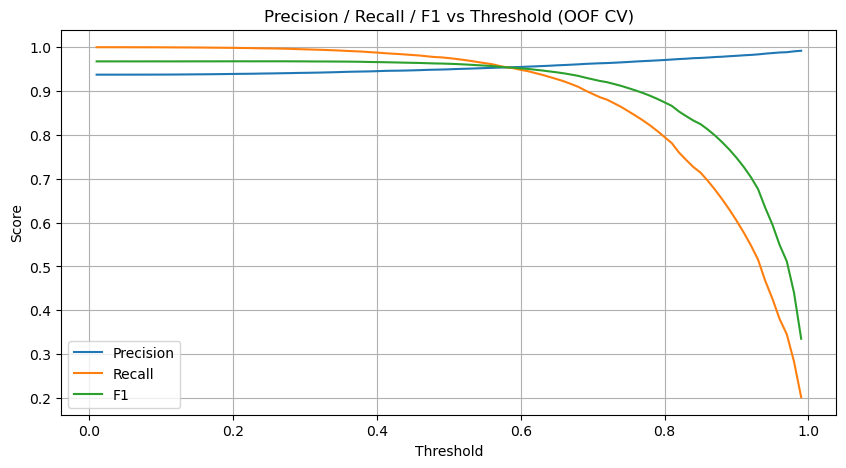


Best threshold (by OOF F1): 0.200
Scores at best threshold (OOF CV):


accuracy     0.937917
precision    0.939055
recall       0.998581
f1           0.967903
Name: 19, dtype: float64


Retraining RandomForest on full training set with SMOTE...

--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.8053469374123303
              precision    recall  f1-score   support

           0     0.3523    0.2040    0.2584      1000
           1     0.9483    0.9750    0.9614     14971

    accuracy                         0.9267     15971
   macro avg     0.6503    0.5895    0.6099     15971
weighted avg     0.9110    0.9267    0.9174     15971

Confusion matrix (rows: true, cols: pred):
[[  204   796]
 [  375 14596]]

--- Test metrics at chosen threshold 0.200 ---
ROC AUC (same): 0.8053469374123303
              precision    recall  f1-score   support

           0     0.5306    0.0260    0.0496      1000
           1     0.9388    0.9985    0.9677     14971

    accuracy                         0.9376     15971
   macro avg     0.7347    0.5122    0.5086     15971
weighted avg     0.9133    0.9376    0.9102     15971

Confusion matrix (rows: true, cols: pred):
[[   26   9

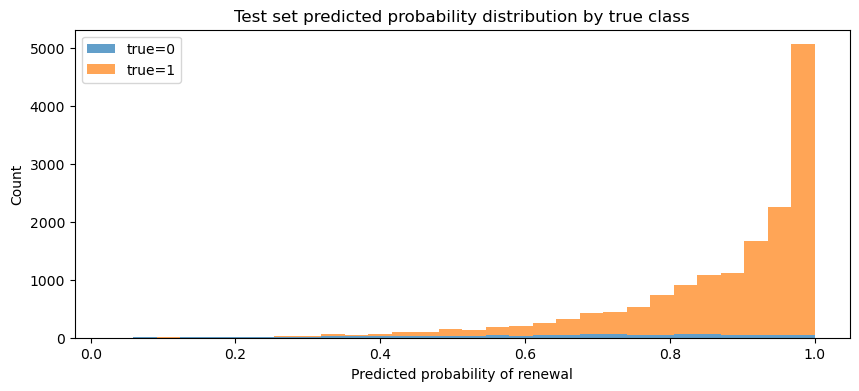

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)

# --- NEW IMPORTS ---
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
DF_RF = OG_proc_imputed_numerical.copy()        # dataframe for tree experiments
TARGET_COL_RF = target_col            # e.g., 'renewal'
RANDOM_STATE_RF = 42
CV_FOLDS_RF = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_rf = DF_RF.drop(columns=[TARGET_COL_RF])
y_rf = DF_RF[TARGET_COL_RF]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.20, stratify=y_rf, random_state=RANDOM_STATE_RF
)

print("Train shape:", X_rf_train.shape, "Test shape:", X_rf_test.shape)
print("Train class distribution:\n", y_rf_train.value_counts(normalize=True))
print("Test class distribution:\n", y_rf_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & OOF probabilities via cross_val_predict
# --- MODIFIED SECTION ---
# Create a pipeline that first applies SMOTE and then trains the classifier
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',  # Keep this for an extra layer of handling
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])

cv_splitter = StratifiedKFold(n_splits=CV_FOLDS_RF, shuffle=True, random_state=RANDOM_STATE_RF)

# Get out-of-fold probabilities for the training set (used for threshold tuning)
# Use the new pipeline in cross_val_predict
print("\nObtaining out-of-fold predicted probabilities with SMOTE (this may take a while)...")
y_rf_oof_proba = cross_val_predict(
    smote_pipeline, X_rf_train, y_rf_train, cv=cv_splitter, method="predict_proba", n_jobs=-1
)[:, 1]
# --- END MODIFIED SECTION ---

# Quick sanity: OOF proba length should match train size
assert len(y_rf_oof_proba) == X_rf_train.shape[0]

# -----------------------------
# 3) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_rf_oof_pred_t = (y_rf_oof_proba >= t).astype(int)
    prec = precision_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    rec = recall_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    f1 = f1_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_rf_train, y_rf_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV (you can change criterion)
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 4) Retrain on full training set and evaluate on test set
# --- MODIFIED SECTION ---
print("\nRetraining RandomForest on full training set with SMOTE...")
# Use the same pipeline for the final model training
rf_final = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])
rf_final.fit(X_rf_train, y_rf_train)
# --- END MODIFIED SECTION ---

# Predict probabilities on test set
y_rf_test_proba = rf_final.predict_proba(X_rf_test)[:, 1]
y_rf_test_pred_default = (y_rf_test_proba >= 0.5).astype(int)
y_rf_test_pred_best = (y_rf_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_rf_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 5) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_rf_test_proba[y_rf_test==0], y_rf_test_proba[y_rf_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

In [239]:
OG_proc_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   Income                            79853 non-null  int64  
 2   Count_3-6_months_late             79853 non-null  float64
 3   Count_6-12_months_late            79853 non-null  float64
 4   Count_more_than_12_months_late    79853 non-null  float64
 5   application_underwriting_score    79853 non-null  float64
 6   no_of_premiums_paid               79853 non-null  int64  
 7   sourcing_channel                  79853 non-null  object 
 8   residence_area_type               79853 non-null  object 
 9   premium                           79853 non-null  int64  
 10  renewal                           79853 non-null  int64  
 11  age_in_years                      79853 non-null  int64  
dtypes: f

In [241]:
OG_proc_imputed_numerical = OG_proc_imputed.drop(columns=['sourcing_channel', 'residence_area_type'])

Train shape: (63882, 9) Test shape: (15971, 9)
Train class distribution:
 renewal
1    0.937416
0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1    0.937387
0    0.062613
Name: proportion, dtype: float64

XGBoost scale_pos_weight: 14.98

Obtaining out-of-fold predicted probabilities with XGBoost (this may take a while)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

threshold  accuracy  precision    recall        f1
0       0.01  0.937353   0.937467  0.999866  0.967662
1       0.02  0.937385   0.937551  0.999800  0.967675
2       0.03  0.937463   0.937652  0.999766  0.967713
3       0.04  0.937525   0.937724  0.999750  0.967744
4       0.05  0.937525   0.937806  0.999649  0.967741
5       0.06  0.937510   0.937888  0.999532  0.967729
6       0.07  0.937557   0.937959  0.999499  0.967752
7       0.08  0.937525   0.937985  0.999432  0.967734
8       0.09  0.937525   0.938012  0.999399  0.967733
9       0.10  0.937572   0.938098  0.999349  0.967755

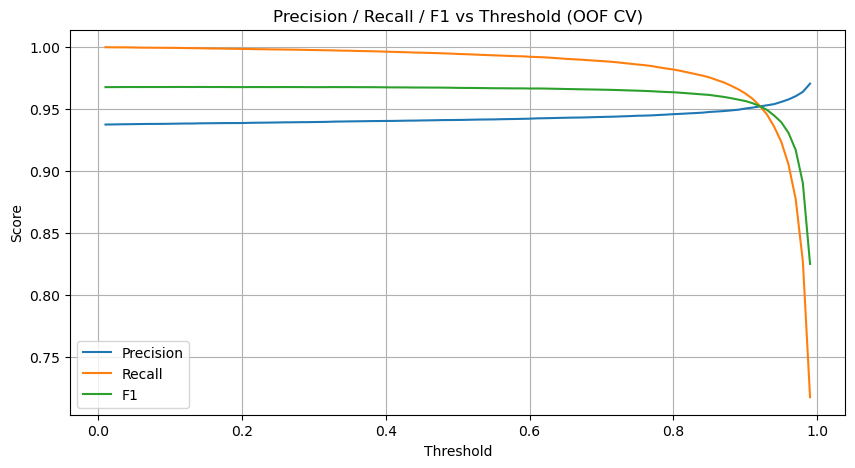


Best threshold (by OOF F1): 0.140
Scores at best threshold (OOF CV):


accuracy     0.937666
precision    0.938433
recall       0.999048
f1           0.967793
Name: 13, dtype: float64


Retraining XGBoost on full training set with SMOTE...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.7784475986908023
              precision    recall  f1-score   support

           0     0.3905    0.0410    0.0742      1000
           1     0.9396    0.9957    0.9668     14971

    accuracy                         0.9359     15971
   macro avg     0.6650    0.5184    0.5205     15971
weighted avg     0.9052    0.9359    0.9109     15971

Confusion matrix (rows: true, cols: pred):
[[   41   959]
 [   64 14907]]

--- Test metrics at chosen threshold 0.140 ---
ROC AUC (same): 0.7784475986908023
              precision    recall  f1-score   support

           0     0.4783    0.0110    0.0215      1000
           1     0.9380    0.9992    0.9676     14971

    accuracy                         0.9373     15971
   macro avg     0.7081    0.5051    0.4946     15971
weighted avg     0.9092    0.9373    0.9084     15971

Confusion matrix (rows: true, cols: pred):
[[   11   989]
 [   12 14959]]

Predicted counts at threshold 0.140:
0 

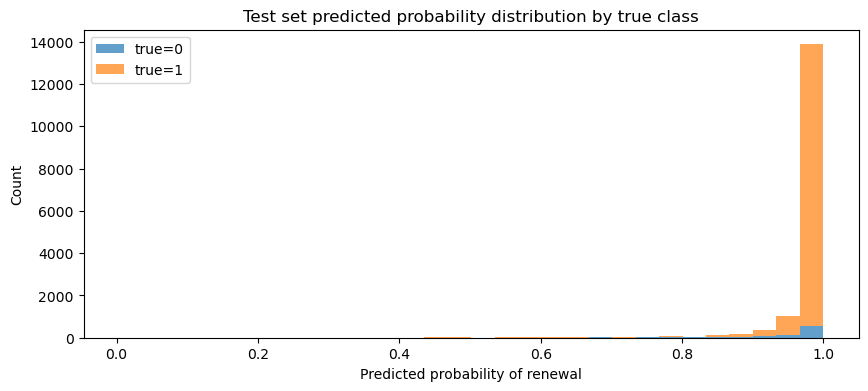

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)

# --- NEW IMPORTS ---
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import xgboost as xgb
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
# Use the new numerical DataFrame
DF_XGB = OG_proc_imputed_numerical.copy()
TARGET_COL_XGB = target_col
RANDOM_STATE_XGB = 42
CV_FOLDS_XGB = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_xgb = DF_XGB.drop(columns=[TARGET_COL_XGB])
y_xgb = DF_XGB[TARGET_COL_XGB]

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(
    X_xgb, y_xgb, test_size=0.20, stratify=y_xgb, random_state=RANDOM_STATE_XGB
)

print("Train shape:", X_xgb_train.shape, "Test shape:", X_xgb_test.shape)
print("Train class distribution:\n", y_xgb_train.value_counts(normalize=True))
print("Test class distribution:\n", y_xgb_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & OOF probabilities via cross_val_predict
# -----------------------------
# Calculate scale_pos_weight for XGBoost
neg_count = (y_xgb_train == 0).sum()
pos_count = (y_xgb_train == 1).sum()
xgb_scale_pos_weight = pos_count / neg_count
print(f"\nXGBoost scale_pos_weight: {xgb_scale_pos_weight:.2f}")

# Create an XGBoost pipeline with SMOTE
xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_XGB)),
    ('classifier', xgb.XGBClassifier(
        n_estimators=300,
        scale_pos_weight=xgb_scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_STATE_XGB,
        n_jobs=-1
    ))
])

cv_splitter = StratifiedKFold(n_splits=CV_FOLDS_XGB, shuffle=True, random_state=RANDOM_STATE_XGB)

# Get out-of-fold probabilities for the training set (used for threshold tuning)
print("\nObtaining out-of-fold predicted probabilities with XGBoost (this may take a while)...")
y_xgb_oof_proba = cross_val_predict(
    xgb_pipeline, X_xgb_train, y_xgb_train, cv=cv_splitter, method="predict_proba", n_jobs=-1
)[:, 1]

# Quick sanity: OOF proba length should match train size
assert len(y_xgb_oof_proba) == X_xgb_train.shape[0]

# -----------------------------
# 3) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_xgb_oof_pred_t = (y_xgb_oof_proba >= t).astype(int)
    prec = precision_score(y_xgb_train, y_xgb_oof_pred_t, zero_division=0)
    rec = recall_score(y_xgb_train, y_xgb_oof_pred_t, zero_division=0)
    f1 = f1_score(y_xgb_train, y_xgb_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_xgb_train, y_xgb_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 4) Retrain on full training set and evaluate on test set
# -----------------------------
print("\nRetraining XGBoost on full training set with SMOTE...")
xgb_final = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE_XGB)),
    ('classifier', xgb.XGBClassifier(
        n_estimators=300,
        scale_pos_weight=xgb_scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_STATE_XGB,
        n_jobs=-1
    ))
])
xgb_final.fit(X_xgb_train, y_xgb_train)

# Predict probabilities on test set
y_xgb_test_proba = xgb_final.predict_proba(X_xgb_test)[:, 1]
y_xgb_test_pred_default = (y_xgb_test_proba >= 0.5).astype(int)
y_xgb_test_pred_best = (y_xgb_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_xgb_test, y_xgb_test_proba))
print(classification_report(y_xgb_test, y_xgb_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_xgb_test, y_xgb_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_xgb_test, y_xgb_test_proba))
print(classification_report(y_xgb_test, y_xgb_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_xgb_test, y_xgb_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_xgb_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 5) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_xgb_test_proba[y_xgb_test==0], y_xgb_test_proba[y_xgb_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

Train shape: (63882, 9) Test shape: (15971, 9)
Train class distribution:
 renewal
1    0.937416
0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1    0.937387
0    0.062613
Name: proportion, dtype: float64

Performing Randomized Search for best hyperparameters (this may take a while)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 47907, number of negative: 47907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 95814, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 47907, number of negative: 3198
[LightGBM] [Info] Auto-choosing row-wise multi

threshold  accuracy  precision    recall        f1
0       0.01  0.937932   0.938422  0.999365  0.967935
1       0.02  0.938214   0.939087  0.998881  0.968061
2       0.03  0.938183   0.939678  0.998130  0.968022
3       0.04  0.938136   0.940229  0.997412  0.967977
4       0.05  0.937964   0.940871  0.996443  0.967860
5       0.06  0.937792   0.941390  0.995625  0.967748
6       0.07  0.937494   0.941819  0.994773  0.967572
7       0.08  0.937259   0.942295  0.993938  0.967428
8       0.09  0.937009   0.942715  0.993153  0.967277
9       0.10  0.937009   0.943319  0.992435  0.967254

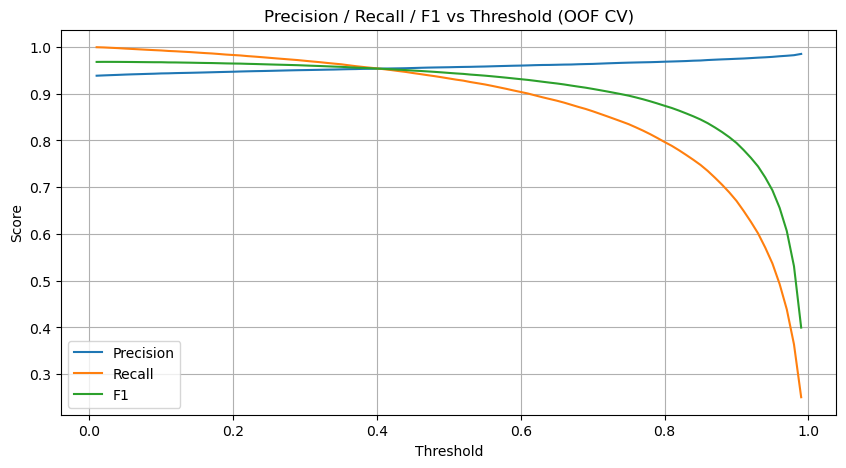


Best threshold (by OOF F1): 0.020
Scores at best threshold (OOF CV):


accuracy     0.938214
precision    0.939087
recall       0.998881
f1           0.968061
Name: 1, dtype: float64


Evaluating the best LightGBM model on the test set...

--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.7839430899739497
              precision    recall  f1-score   support

           0     0.2525    0.4040    0.3108      1000
           1     0.9585    0.9201    0.9389     14971

    accuracy                         0.8878     15971
   macro avg     0.6055    0.6621    0.6248     15971
weighted avg     0.9143    0.8878    0.8996     15971

Confusion matrix (rows: true, cols: pred):
[[  404   596]
 [ 1196 13775]]

--- Test metrics at chosen threshold 0.020 ---
ROC AUC (same): 0.7839430899739497
              precision    recall  f1-score   support

           0     0.4681    0.0220    0.0420      1000
           1     0.9386    0.9983    0.9675     14971

    accuracy                         0.9372     15971
   macro avg     0.7033    0.5102    0.5048     15971
weighted avg     0.9091    0.9372    0.9096     15971

Confusion matrix (rows: true, cols: pred):
[[   22   978]
 

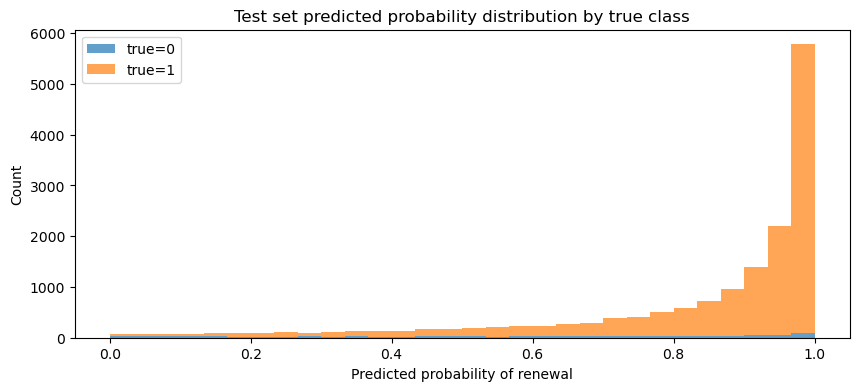

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)
from scipy.stats import randint as sp_randint

# --- NEW IMPORTS ---
import lightgbm as lgb
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
DF_LGB = OG_proc_imputed_numerical.copy()
TARGET_COL_LGB = target_col
RANDOM_STATE_LGB = 42
CV_FOLDS_LGB = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_lgb = DF_LGB.drop(columns=[TARGET_COL_LGB])
y_lgb = DF_LGB[TARGET_COL_LGB]

X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(
    X_lgb, y_lgb, test_size=0.20, stratify=y_lgb, random_state=RANDOM_STATE_LGB
)

print("Train shape:", X_lgb_train.shape, "Test shape:", X_lgb_test.shape)
print("Train class distribution:\n", y_lgb_train.value_counts(normalize=True))
print("Test class distribution:\n", y_lgb_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & Hyperparameter Tuning
# -----------------------------
# Define a LightGBM classifier without SMOTE
lgbm_model = lgb.LGBMClassifier(
    is_unbalance=True, # Built-in parameter for imbalanced data
    random_state=RANDOM_STATE_LGB,
    n_jobs=-1,
    verbose=0
)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': sp_randint(3, 15),
    'num_leaves': sp_randint(10, 50),
    'reg_alpha': [0, 0.1, 0.5, 1], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1] # L2 regularization
}

# Perform Randomized Search to find the best model hyperparameters
print("\nPerforming Randomized Search for best hyperparameters (this may take a while)...")
random_search = RandomizedSearchCV(
    lgbm_model, param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE_LGB),
    random_state=RANDOM_STATE_LGB,
    n_jobs=-1,
    verbose=0
)

# Fit the search to the training data
random_search.fit(X_lgb_train, y_lgb_train)

# Get the best model found by the search
lgbm_final = random_search.best_estimator_

print("\nBest hyperparameters found:")
print(random_search.best_params_)

# -----------------------------
# 3) Get OOF probabilities for threshold sweep
# -----------------------------
print("\nObtaining out-of-fold predicted probabilities for threshold tuning...")
y_lgb_oof_proba = cross_val_predict(
    lgbm_final, X_lgb_train, y_lgb_train, cv=CV_FOLDS_LGB, method="predict_proba", n_jobs=-1
)[:, 1]

# -----------------------------
# 4) Threshold sweep on OOF predictions (rest of code is the same)
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_lgb_oof_pred_t = (y_lgb_oof_proba >= t).astype(int)
    prec = precision_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    rec = recall_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    f1 = f1_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_lgb_train, y_lgb_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 5) Evaluate on test set
# -----------------------------
print("\nEvaluating the best LightGBM model on the test set...")
y_lgb_test_proba = lgbm_final.predict_proba(X_lgb_test)[:, 1]
y_lgb_test_pred_default = (y_lgb_test_proba >= 0.5).astype(int)
y_lgb_test_pred_best = (y_lgb_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_lgb_test, y_lgb_test_proba))
print(classification_report(y_lgb_test, y_lgb_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_lgb_test, y_lgb_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_lgb_test, y_lgb_test_proba))
print(classification_report(y_lgb_test, y_lgb_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_lgb_test, y_lgb_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_lgb_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 6) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_lgb_test_proba[y_lgb_test==0], y_lgb_test_proba[y_lgb_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

Train shape: (63882, 9) Test shape: (15971, 9)
Train class distribution:
 renewal
1    0.937416
0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1    0.937387
0    0.062613
Name: proportion, dtype: float64

Performing Randomized Search for best hyperparameters with Undersampling...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3198, number of negative: 3198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 6396, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

threshold  accuracy  precision    recall        f1
0       0.01  0.937447   0.937459  0.999983  0.967712
1       0.02  0.937854   0.937978  0.999816  0.967910
2       0.03  0.938214   0.938921  0.999082  0.968068
3       0.04  0.938543   0.940489  0.997562  0.968185
4       0.05  0.938872   0.942557  0.995458  0.968285
5       0.06  0.938997   0.944560  0.993220  0.968279
6       0.07  0.938668   0.946357  0.990732  0.968036
7       0.08  0.937416   0.947919  0.987492  0.967301
8       0.09  0.936195   0.949542  0.984236  0.966578
9       0.10  0.934786   0.951173  0.980780  0.965749

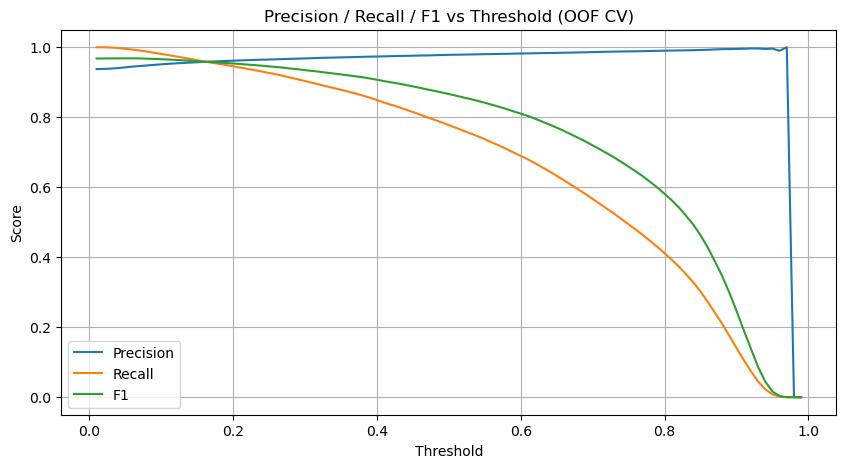


Best threshold (by OOF F1): 0.050
Scores at best threshold (OOF CV):


accuracy     0.938872
precision    0.942557
recall       0.995458
f1           0.968285
Name: 4, dtype: float64


Evaluating the best LightGBM model on the test set...

--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.8437098056242068
              precision    recall  f1-score   support

           0     0.1860    0.7570    0.2986      1000
           1     0.9796    0.7787    0.8677     14971

    accuracy                         0.7773     15971
   macro avg     0.5828    0.7679    0.5831     15971
weighted avg     0.9299    0.7773    0.8320     15971

Confusion matrix (rows: true, cols: pred):
[[  757   243]
 [ 3313 11658]]

--- Test metrics at chosen threshold 0.050 ---
ROC AUC (same): 0.8437098056242068
              precision    recall  f1-score   support

           0     0.5662    0.0770    0.1356      1000
           1     0.9417    0.9961    0.9681     14971

    accuracy                         0.9385     15971
   macro avg     0.7539    0.5365    0.5518     15971
weighted avg     0.9182    0.9385    0.9160     15971

Confusion matrix (rows: true, cols: pred):
[[   77   923]
 

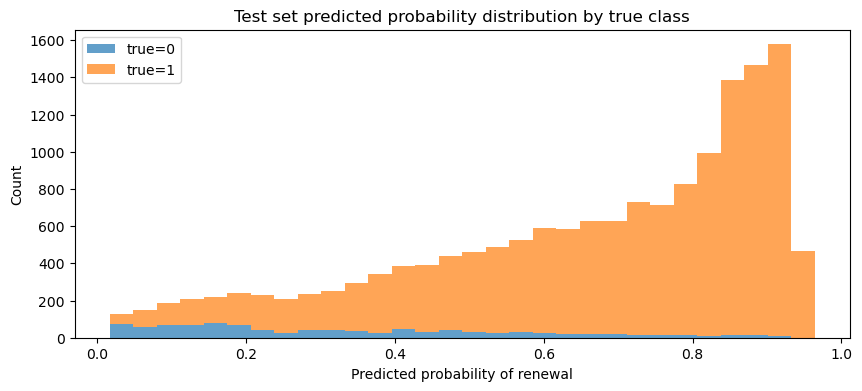

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)
from scipy.stats import randint as sp_randint

# --- NEW IMPORTS ---
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
DF_LGB = OG_proc_imputed_numerical.copy()
TARGET_COL_LGB = target_col
RANDOM_STATE_LGB = 42
CV_FOLDS_LGB = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_lgb = DF_LGB.drop(columns=[TARGET_COL_LGB])
y_lgb = DF_LGB[TARGET_COL_LGB]

X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(
    X_lgb, y_lgb, test_size=0.20, stratify=y_lgb, random_state=RANDOM_STATE_LGB
)

print("Train shape:", X_lgb_train.shape, "Test shape:", X_lgb_test.shape)
print("Train class distribution:\n", y_lgb_train.value_counts(normalize=True))
print("Test class distribution:\n", y_lgb_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & Hyperparameter Tuning (with Undersampling)
# -----------------------------
# Define a LightGBM classifier
lgbm_model = lgb.LGBMClassifier(
    is_unbalance=True, # Built-in parameter for imbalanced data
    random_state=RANDOM_STATE_LGB,
    n_jobs=-1,
    verbose=0
)

# Define the hyperparameter search space
param_dist = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': sp_randint(3, 15),
    'classifier__num_leaves': sp_randint(10, 50),
    'classifier__reg_alpha': [0, 0.1, 0.5, 1], # L1 regularization
    'classifier__reg_lambda': [0, 0.1, 0.5, 1]  # L2 regularization
}

# Create a pipeline that first undersamples, then trains the model
# NOTE: This replaces the SMOTE pipeline from the previous version
undersample_pipeline = Pipeline([
    ('undersampler', RandomUnderSampler(random_state=RANDOM_STATE_LGB)),
    ('classifier', lgbm_model)
])

# Perform Randomized Search to find the best model hyperparameters
print("\nPerforming Randomized Search for best hyperparameters with Undersampling...")
random_search = RandomizedSearchCV(
    undersample_pipeline, # Use the new undersampling pipeline
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE_LGB),
    random_state=RANDOM_STATE_LGB,
    n_jobs=-1,
    verbose=0
)

# Fit the search to the training data
random_search.fit(X_lgb_train, y_lgb_train)

# Get the best model found by the search
lgbm_final = random_search.best_estimator_

print("\nBest hyperparameters found:")
print(random_search.best_params_)

# -----------------------------
# 3) Get OOF probabilities for threshold sweep
# -----------------------------
print("\nObtaining out-of-fold predicted probabilities for threshold tuning...")
y_lgb_oof_proba = cross_val_predict(
    lgbm_final, X_lgb_train, y_lgb_train, cv=CV_FOLDS_LGB, method="predict_proba", n_jobs=-1
)[:, 1]

# -----------------------------
# 4) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_lgb_oof_pred_t = (y_lgb_oof_proba >= t).astype(int)
    prec = precision_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    rec = recall_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    f1 = f1_score(y_lgb_train, y_lgb_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_lgb_train, y_lgb_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 5) Evaluate on test set
# -----------------------------
print("\nEvaluating the best LightGBM model on the test set...")
y_lgb_test_proba = lgbm_final.predict_proba(X_lgb_test)[:, 1]
y_lgb_test_pred_default = (y_lgb_test_proba >= 0.5).astype(int)
y_lgb_test_pred_best = (y_lgb_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_lgb_test, y_lgb_test_proba))
print(classification_report(y_lgb_test, y_lgb_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_lgb_test, y_lgb_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_lgb_test, y_lgb_test_proba))
print(classification_report(y_lgb_test, y_lgb_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_lgb_test, y_lgb_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_lgb_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 6) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_lgb_test_proba[y_lgb_test==0], y_lgb_test_proba[y_lgb_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

Train shape: (63882, 15) Test shape: (15971, 15)
Train class distribution:
 renewal
1.0    0.937416
0.0    0.062584
Name: proportion, dtype: float64
Test class distribution:
 renewal
1.0    0.937387
0.0    0.062613
Name: proportion, dtype: float64

Obtaining out-of-fold predicted probabilities with Undersampling...


threshold  accuracy  precision    recall        f1
0       0.01  0.937416   0.937457  0.999950  0.967696
1       0.02  0.937525   0.937848  0.999599  0.967739
2       0.03  0.937604   0.938484  0.998915  0.967757
3       0.04  0.937995   0.939487  0.998146  0.967929
4       0.05  0.938042   0.940529  0.996944  0.967915
5       0.06  0.937776   0.941878  0.995024  0.967722
6       0.07  0.937541   0.942620  0.993871  0.967567
7       0.08  0.936524   0.943785  0.991333  0.966975
8       0.09  0.936257   0.945114  0.989463  0.966780
9       0.10  0.935522   0.946441  0.987075  0.966331

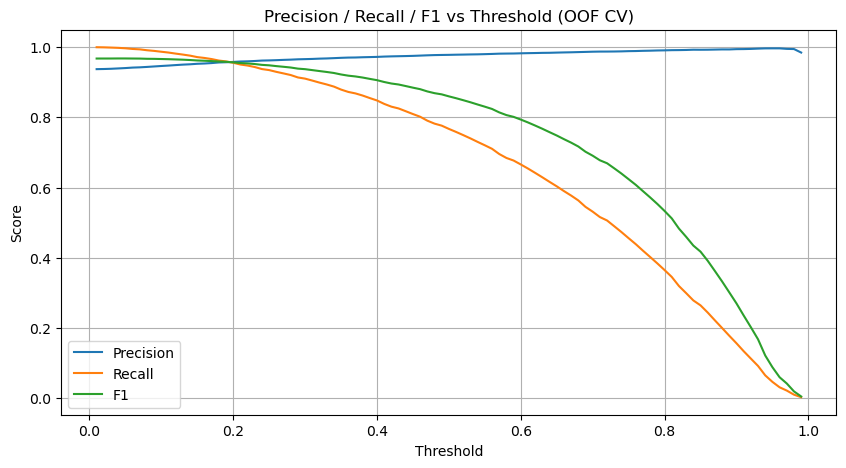


Best threshold (by OOF F1): 0.040
Scores at best threshold (OOF CV):


accuracy     0.937995
precision    0.939487
recall       0.998146
f1           0.967929
Name: 3, dtype: float64


Retraining RandomForest on full training set with Undersampling...

--- Test metrics at default threshold 0.5 ---
ROC AUC: 0.83437889920513
              precision    recall  f1-score   support

         0.0     0.1793    0.7480    0.2892      1000
         1.0     0.9786    0.7713    0.8627     14971

    accuracy                         0.7698     15971
   macro avg     0.5790    0.7596    0.5760     15971
weighted avg     0.9286    0.7698    0.8268     15971

Confusion matrix (rows: true, cols: pred):
[[  748   252]
 [ 3424 11547]]

--- Test metrics at chosen threshold 0.040 ---
ROC AUC (same): 0.83437889920513
              precision    recall  f1-score   support

         0.0     0.5962    0.0310    0.0589      1000
         1.0     0.9391    0.9986    0.9680     14971

    accuracy                         0.9380     15971
   macro avg     0.7676    0.5148    0.5134     15971
weighted avg     0.9177    0.9380    0.9110     15971

Confusion matrix (rows: true, cols: pred):
[[   31

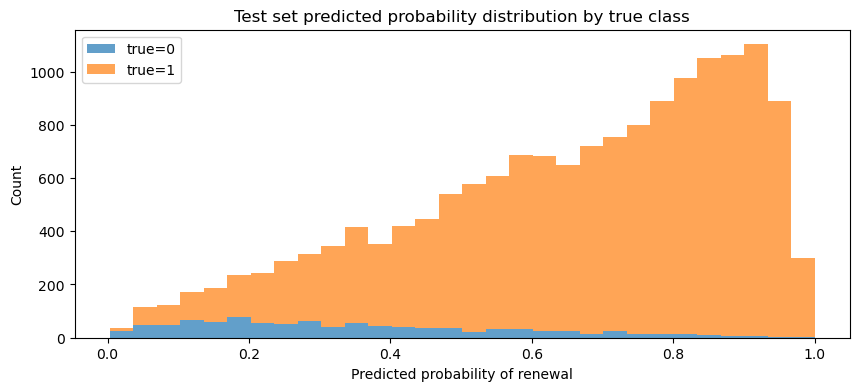

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)

# --- NEW IMPORTS ---
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# --- END NEW IMPORTS ---

# -----------------------------
# Config / dataset names (unique variables)
# -----------------------------
# Use the full dataframe including categorical columns for this test
DF_RF = OG_proc_encoded_imputed.copy()
TARGET_COL_RF = target_col
RANDOM_STATE_RF = 42
CV_FOLDS_RF = 5

# -----------------------------
# 1) Train / Test split (keep test untouched)
# -----------------------------
X_rf = DF_RF.drop(columns=[TARGET_COL_RF])
y_rf = DF_RF[TARGET_COL_RF]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.20, stratify=y_rf, random_state=RANDOM_STATE_RF
)

print("Train shape:", X_rf_train.shape, "Test shape:", X_rf_test.shape)
print("Train class distribution:\n", y_rf_train.value_counts(normalize=True))
print("Test class distribution:\n", y_rf_test.value_counts(normalize=True))

# -----------------------------
# 2) Model & OOF probabilities via cross_val_predict
# --- MODIFIED SECTION ---
# Create a pipeline that first undersamples, then trains the classifier
rf_cv_pipeline = Pipeline([
    ('undersampler', RandomUnderSampler(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight='balanced',  # Keep this for an extra layer of handling
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])

cv_splitter = StratifiedKFold(n_splits=CV_FOLDS_RF, shuffle=True, random_state=RANDOM_STATE_RF)

# Get out-of-fold probabilities for the training set (used for threshold tuning)
print("\nObtaining out-of-fold predicted probabilities with Undersampling...")
y_rf_oof_proba = cross_val_predict(
    rf_cv_pipeline, X_rf_train, y_rf_train, cv=cv_splitter, method="predict_proba", n_jobs=-1
)[:, 1]
# --- END MODIFIED SECTION ---

# Quick sanity: OOF proba length should match train size
assert len(y_rf_oof_proba) == X_rf_train.shape[0]

# -----------------------------
# 3) Threshold sweep on OOF predictions
# -----------------------------
thresholds = np.linspace(0.01, 0.99, 99)
sweep_results = []

for t in thresholds:
    y_rf_oof_pred_t = (y_rf_oof_proba >= t).astype(int)
    prec = precision_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    rec = recall_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    f1 = f1_score(y_rf_train, y_rf_oof_pred_t, zero_division=0)
    acc = accuracy_score(y_rf_train, y_rf_oof_pred_t)
    sweep_results.append((t, acc, prec, rec, f1))

sweep_df = pd.DataFrame(sweep_results, columns=['threshold','accuracy','precision','recall','f1'])
display(sweep_df.head(10))

# Plot Precision / Recall / F1 vs Threshold
plt.figure(figsize=(10,5))
plt.plot(sweep_df['threshold'], sweep_df['precision'], label='Precision')
plt.plot(sweep_df['threshold'], sweep_df['recall'], label='Recall')
plt.plot(sweep_df['threshold'], sweep_df['f1'], label='F1')
plt.xlabel('Threshold'); plt.ylabel('Score'); plt.title('Precision / Recall / F1 vs Threshold (OOF CV)')
plt.grid(True); plt.legend()
plt.show()

# Choose threshold that maximizes F1 on OOF CV
best_idx = sweep_df['f1'].idxmax()
best_threshold = float(sweep_df.loc[best_idx, 'threshold'])
best_scores = sweep_df.loc[best_idx, ['accuracy','precision','recall','f1']]
print(f"\nBest threshold (by OOF F1): {best_threshold:.3f}")
print("Scores at best threshold (OOF CV):")
display(best_scores)

# -----------------------------
# 4) Retrain on full training set and evaluate on test set
# --- MODIFIED SECTION ---
print("\nRetraining RandomForest on full training set with Undersampling...")
rf_final = Pipeline([
    ('undersampler', RandomUnderSampler(random_state=RANDOM_STATE_RF)),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight='balanced',
        random_state=RANDOM_STATE_RF,
        n_jobs=-1
    ))
])
rf_final.fit(X_rf_train, y_rf_train)
# --- END MODIFIED SECTION ---

# Predict probabilities on test set
y_rf_test_proba = rf_final.predict_proba(X_rf_test)[:, 1]
y_rf_test_pred_default = (y_rf_test_proba >= 0.5).astype(int)
y_rf_test_pred_best = (y_rf_test_proba >= best_threshold).astype(int)

# Metrics at default 0.5
print("\n--- Test metrics at default threshold 0.5 ---")
print("ROC AUC:", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_default, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_default))

# Metrics at best_threshold found from CV
print(f"\n--- Test metrics at chosen threshold {best_threshold:.3f} ---")
print("ROC AUC (same):", roc_auc_score(y_rf_test, y_rf_test_proba))
print(classification_report(y_rf_test, y_rf_test_pred_best, digits=4))
print("Confusion matrix (rows: true, cols: pred):")
print(confusion_matrix(y_rf_test, y_rf_test_pred_best))

# Also show predicted positive counts for test set at chosen threshold
pred_counts = pd.Series(y_rf_test_pred_best).value_counts().sort_index()
print(f"\nPredicted counts at threshold {best_threshold:.3f}:")
print(pred_counts.to_string())

# -----------------------------
# 5) Optional: show calibration-ish view (probability histogram by true class)
# -----------------------------
plt.figure(figsize=(10,4))
plt.hist([y_rf_test_proba[y_rf_test==0], y_rf_test_proba[y_rf_test==1]],
          bins=30, stacked=True, label=['true=0','true=1'], density=False, alpha=0.7)
plt.title('Test set predicted probability distribution by true class')
plt.xlabel('Predicted probability of renewal')
plt.ylabel('Count')
plt.legend()
plt.show()

In [283]:
import numpy as np, pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

# Assume OG_proc_imputed is already loaded into your environment
# and contains the necessary features and target column.

RANDOM_STATE = 42
TARGET_COL = "renewal"

# ---------- Use Existing DataFrame ----------
df_yash = OG_proc_encoded_imputed.copy()
assert TARGET_COL in df_yash.columns
y = df_yash[TARGET_COL].astype(int)
X = df_yash.drop(columns=[TARGET_COL]).copy()

# Identify columns (all columns are now treated as numeric)
num_cols = X.columns.tolist()

# ---------- Train/Valid Split ----------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# ---------- Impute NaNs (if any remain) ----------
num_medians = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(num_medians)
X_valid[num_cols] = X_valid[num_cols].fillna(num_medians)

print("Train class distribution BEFORE:", Counter(y_train))

# ---------- Population methods for Numerical data ----------
resamplers = [
    # Use SMOTE for purely numerical data
    ("SMOTE 1:1", SMOTE(sampling_strategy="auto", k_neighbors=5, random_state=RANDOM_STATE)),
    ("SMOTEENN (SMOTE+ENN)", SMOTEENN(smote=SMOTE(random_state=RANDOM_STATE), random_state=RANDOM_STATE)),
]

summary = []; conf_mats = {}

for name, resampler in resamplers:
    print(f"\n=== {name} ===")
    
    # Resample on the numerical data directly
    X_res, y_res = resampler.fit_resample(X_train, y_train.values)
    print("AFTER resample:", Counter(y_res))

    # XGBoost with standard parameters for numerical data
    clf = XGBClassifier(
        eval_metric="logloss",
        random_state=RANDOM_STATE,
        n_estimators=400,
        learning_rate=0.1,
        max_depth=5,
        subsample=1.0,
        colsample_bytree=1.0
    )
    clf.fit(X_res, y_res)

    # Evaluate
    y_prob = clf.predict_proba(X_valid)[:, 1]
    y_pred = (y_prob >= 0.51).astype(int)

    acc  = accuracy_score(y_valid, y_pred)
    prec = precision_score(y_valid, y_pred, zero_division=0)
    rec  = recall_score(y_valid, y_pred, zero_division=0)
    f1   = f1_score(y_valid, y_pred, zero_division=0)
    roc  = roc_auc_score(y_valid, y_prob)
    cm   = confusion_matrix(y_valid, y_pred)

    conf_mats[name] = cm
    summary.append({
        "Method": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "ROC_AUC": round(roc, 4)
    })

# ---------- Summary ----------
summary_df = pd.DataFrame(summary).sort_values("F1", ascending=False).reset_index(drop=True)
print("\n===== Summary (sorted by F1) =====")
print(summary_df)

print("\n===== Confusion Matrices (rows=true, cols=pred) =====")
for k, v in conf_mats.items():
    print(f"\n{k}\n{v}")

Train class distribution BEFORE: Counter({1: 59884, 0: 3998})

=== SMOTE 1:1 ===
AFTER resample: Counter({1: 59884, 0: 59884})

=== SMOTEENN (SMOTE+ENN) ===
AFTER resample: Counter({0: 35777, 1: 33092})

===== Summary (sorted by F1) =====
                 Method  Accuracy  Precision  Recall      F1  ROC_AUC
0             SMOTE 1:1    0.9363     0.9449  0.9897  0.9668   0.8354
1  SMOTEENN (SMOTE+ENN)    0.9317     0.9484  0.9805  0.9642   0.8129

===== Confusion Matrices (rows=true, cols=pred) =====

SMOTE 1:1
[[  136   864]
 [  154 14817]]

SMOTEENN (SMOTE+ENN)
[[  201   799]
 [  292 14679]]


In [289]:
import numpy as np, pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

# Assume OG_proc_imputed is already loaded into your environment
# and contains the necessary features and target column.

RANDOM_STATE = 42
TARGET_COL = "renewal"

# ---------- Use Existing DataFrame ----------
df_yash = OG_proc_encoded_imputed.copy()
assert TARGET_COL in df_yash.columns
y = df_yash[TARGET_COL].astype(int)
X = df_yash.drop(columns=[TARGET_COL]).copy()

# Identify columns (all columns are now treated as numeric)
num_cols = X.columns.tolist()

# ---------- Train/Valid Split ----------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# ---------- Impute NaNs (if any remain) ----------
num_medians = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(num_medians)
X_valid[num_cols] = X_valid[num_cols].fillna(num_medians)

print("Train class distribution BEFORE:", Counter(y_train))

# ---------- Population methods for Numerical data ----------
resamplers = [
    ("SMOTE 1:1", SMOTE(sampling_strategy="auto", k_neighbors=5, random_state=RANDOM_STATE)),
    ("SMOTEENN (SMOTE+ENN)", SMOTEENN(smote=SMOTE(random_state=RANDOM_STATE), random_state=RANDOM_STATE)),
]

summary = []; conf_mats = {}

for name, resampler in resamplers:
    print(f"\n=== {name} ===")
    
    # Resample on the numerical data directly
    X_res, y_res = resampler.fit_resample(X_train, y_train.values)
    print("AFTER resample:", Counter(y_res))

    # XGBoost with standard parameters for numerical data
    clf = XGBClassifier(
        eval_metric="logloss",
        random_state=RANDOM_STATE,
        n_estimators=400,
        learning_rate=0.1,
        max_depth=5,
        subsample=1.0,
        colsample_bytree=1.0
    )
    clf.fit(X_res, y_res)

    # Evaluate
    y_prob = clf.predict_proba(X_valid)[:, 1]
    y_pred = (y_prob >= 0.51).astype(int)

    acc  = accuracy_score(y_valid, y_pred)
    # The classification_report gives all the metrics you need
    report = classification_report(y_valid, y_pred, output_dict=True, zero_division=0)
    
    prec_0 = report['0']['precision']
    rec_0  = report['0']['recall']
    f1_0   = report['0']['f1-score']
    
    prec_1 = report['1']['precision']
    rec_1  = report['1']['recall']
    f1_1   = report['1']['f1-score']
    
    roc  = roc_auc_score(y_valid, y_prob)
    cm   = confusion_matrix(y_valid, y_pred)

    conf_mats[name] = cm
    summary.append({
        "Method": name,
        "Accuracy": round(acc, 4),
        "Precision_0": round(prec_0, 4),
        "Recall_0": round(rec_0, 4),
        "F1_0": round(f1_0, 4),
        "Precision_1": round(prec_1, 4),
        "Recall_1": round(rec_1, 4),
        "F1_1": round(f1_1, 4),
        "ROC_AUC": round(roc, 4)
    })

# ---------- Summary ----------
summary_df = pd.DataFrame(summary).sort_values("F1_0", ascending=False).reset_index(drop=True)
print("\n===== Summary (sorted by F1 of class 0) =====")
print(summary_df.to_string(index=False)) 

print("\n===== Confusion Matrices (rows=true, cols=pred) =====")
for k, v in conf_mats.items():
    print(f"\n{k}\n{v}")

Train class distribution BEFORE: Counter({1: 59884, 0: 3998})

=== SMOTE 1:1 ===
AFTER resample: Counter({1: 59884, 0: 59884})

=== SMOTEENN (SMOTE+ENN) ===
AFTER resample: Counter({0: 35777, 1: 33092})

===== Summary (sorted by F1 of class 0) =====
              Method  Accuracy  Precision_0  Recall_0   F1_0  Precision_1  Recall_1   F1_1  ROC_AUC
SMOTEENN (SMOTE+ENN)    0.9317       0.4077     0.201 0.2693       0.9484    0.9805 0.9642   0.8129
           SMOTE 1:1    0.9363       0.4690     0.136 0.2109       0.9449    0.9897 0.9668   0.8354

===== Confusion Matrices (rows=true, cols=pred) =====

SMOTE 1:1
[[  136   864]
 [  154 14817]]

SMOTEENN (SMOTE+ENN)
[[  201   799]
 [  292 14679]]


In [291]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# --- NEW IMPORTS ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# --- END NEW IMPORTS ---

# Assume OG_proc_imputed is already loaded into your environment
# and contains the necessary features and target column.

RANDOM_STATE = 42
TARGET_COL = "renewal"

# ---------- Use Existing DataFrame ----------
df = OG_proc_encoded_imputed.copy()
assert TARGET_COL in df.columns
y = df[TARGET_COL].astype(int)
X = df.drop(columns=[TARGET_COL]).copy()

# ---------- Train/Valid Split ----------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# ---------- Impute NaNs (if any remain) ----------
num_cols = X.columns.tolist()
num_medians = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(num_medians)
X_valid[num_cols] = X_valid[num_cols].fillna(num_medians)

# Scale the data for the neural network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print("Train class distribution BEFORE:", Counter(y_train))

# ---------- SMOTE Resampling ----------
print("\n=== SMOTE 1:1 ===")
smote = SMOTE(sampling_strategy="auto", k_neighbors=5, random_state=RANDOM_STATE)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train.values)
print("AFTER resample:", Counter(y_res))

# ---------- Build and Train the ANN Model ----------
# A 4-layer ANN
model = Sequential([
    # Input layer with 64 neurons and ReLU activation
    Dense(64, activation='relu', input_shape=(X_res.shape[1],)),
    Dropout(0.3), # Dropout layer to prevent overfitting
    # Hidden layer 1
    Dense(32, activation='relu'),
    Dropout(0.3),
    # Hidden layer 2
    Dense(16, activation='relu'),
    # Output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
# Use a small validation split to monitor performance during training
history = model.fit(
    X_res, y_res,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ---------- Evaluate on the validation set ----------
print("\n--- Model Evaluation on Validation Set ---")
y_pred_proba = model.predict(X_valid_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred, digits=4))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

Train class distribution BEFORE: Counter({1: 59884, 0: 3998})

=== SMOTE 1:1 ===
AFTER resample: Counter({1: 59884, 0: 59884})
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.7427 - loss: 0.5207 - val_accuracy: 0.6593 - val_loss: 0.6454
Epoch 2/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.7713 - loss: 0.4809 - val_accuracy: 0.6051 - val_loss: 0.6967
Epoch 3/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.7756 - loss: 0.4733 - val_accuracy: 0.6805 - val_loss: 0.6621
Epoch 4/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.7797 - loss: 0.4688 - val_accuracy: 0.6832 - val_loss: 0.6450
Epoch 5/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.7803 - loss: 0.4671 - val_accuracy: 0.6176 - val_loss: 0.6773
Epoch 6/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.7781 - loss: 0.4697 - val_accuracy: 0.5936 - val_loss: 0.7265
Epoch 7/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.7843 - loss: 0.4591 - val_accuracy: 0.6315 - val_loss: 0.6531
Epoch 8/50
2995/2995 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.7832 - loss: 0.46

In [303]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Scikit-learn & Imblearn
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTENC # Use SMOTENC for mixed data types
from imblearn.pipeline import Pipeline as ImbPipeline

# Keras & Scikit-learn wrapper for Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# -----------------------------
# Config / dataset names
# -----------------------------
RANDOM_STATE = 42
TARGET_COL = "renewal"

# Use the pre-processed numerical and one-hot encoded DataFrame
df = OG_proc_encoded_imputed.copy()
assert TARGET_COL in df.columns
y = df[TARGET_COL].astype(int)
X = df.drop(columns=[TARGET_COL]).copy()

# Identify the categorical columns for SMOTENC
cat_cols = ['residence_area_type_Urban', 'sourcing_channel_A', 'sourcing_channel_B',
            'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E']
cat_indices = [X.columns.get_loc(c) for c in cat_cols]

# -----------------------------
# 1) Train/Valid Split
# -----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# -----------------------------
# 2) Define the Keras Model as a Function
# -----------------------------
def create_model(learning_rate=0.01, dropout_rate=0.3, num_neurons_1=64, num_neurons_2=32, num_neurons_3=16):
    """
    Function to create a Keras model for use in scikit-learn's wrappers.
    """
    model = Sequential([
        # Define the input layer with the correct number of features
        tf.keras.layers.Input(shape=(X_train.shape[1],)), # Correctly define input shape here
        Dense(num_neurons_1, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_neurons_2, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_neurons_3, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# -----------------------------
# 3) Build the Pipeline with SMOTENC
# -----------------------------
keras_clf = KerasClassifier(
    model=create_model,
    verbose=0,
    random_state=RANDOM_STATE,
    epochs=100,
    batch_size=32
)

ann_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=RANDOM_STATE)),
    ('classifier', keras_clf)
])

# -----------------------------
# 4) Hyperparameter Tuning with RandomizedSearchCV
# -----------------------------
param_dist = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__model__learning_rate': [0.01, 0.005, 0.001],
    'classifier__model__dropout_rate': [0.2, 0.3, 0.4],
    'classifier__model__num_neurons_1': [64, 128],
    'classifier__model__num_neurons_2': [32, 64],
    'classifier__model__num_neurons_3': [16, 32],
    'classifier__epochs': [50, 100, 150],
}

cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("Starting hyperparameter search (this will take a while)...")
random_search = RandomizedSearchCV(
    estimator=ann_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=cv_splitter,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

best_ann_model = random_search.best_estimator_
print("\nBest parameters found:")
print(random_search.best_params_)
print(f"\nBest F1 score from search: {random_search.best_score_:.4f}")

# -----------------------------
# 5) Evaluate on the test set
# -----------------------------
print("\n--- Final Model Evaluation on Test Set ---")
y_pred_proba = best_ann_model.predict_proba(X_valid)[:, 1]

y_pred = (y_pred_proba > 0.5).astype(int)

print("\nClassification Report (Test Set):")
print(classification_report(y_valid, y_pred, digits=4))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_valid, y_pred))

# -----------------------------
# Optional: Using Class Weights instead of SMOTE
# -----------------------------
print("\n--- Training with Class Weights (Alternative approach) ---")
total_samples = len(y_train)
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
class_weights = {0: total_samples / (2 * neg_count), 1: total_samples / (2 * pos_count)}
print(f"Calculated Class Weights: {class_weights}")

# Re-define the pipeline without SMOTE
ann_pipeline_weights = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', keras_clf)
])

# Fit the pipeline and pass the class weights
ann_pipeline_weights.fit(X_train, y_train, classifier__class_weight=class_weights)

# Evaluate the class-weighted model
y_pred_proba_w = ann_pipeline_weights.predict_proba(X_valid)[:, 1]
y_pred_w = (y_pred_proba_w > 0.5).astype(int)
print("\nClassification Report (Test Set - Class Weights):")
print(classification_report(y_valid, y_pred_w, digits=4))
print("Confusion Matrix (Test Set - Class Weights):")
print(confusion_matrix(y_valid, y_pred_w))

Starting hyperparameter search (this will take a while)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025-09-14 23:40:25.433268: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-09-14 23:40:25.434179: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


Best parameters found:
{'smote__k_neighbors': 7, 'classifier__model__num_neurons_3': 32, 'classifier__model__num_neurons_2': 32, 'classifier__model__num_neurons_1': 128, 'classifier__model__learning_rate': 0.01, 'classifier__model__dropout_rate': 0.4, 'classifier__epochs': 150}

Best F1 score from search: 0.9138

--- Final Model Evaluation on Test Set ---

Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.1925    0.6240    0.2942      1000
           1     0.9705    0.8251    0.8919     14971

    accuracy                         0.8125     15971
   macro avg     0.5815    0.7246    0.5931     15971
weighted avg     0.9217    0.8125    0.8545     15971

Confusion Matrix (Test Set):
[[  624   376]
 [ 2618 12353]]

--- Training with Class Weights (Alternative approach) ---
Calculated Class Weights: {0: 7.989244622311156, 1: 0.5333812036604101}


2025-09-15 03:02:41.482177: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-09-15 03:02:41.482422: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


Classification Report (Test Set - Class Weights):
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1000
           1     0.9374    1.0000    0.9677     14971

    accuracy                         0.9374     15971
   macro avg     0.4687    0.5000    0.4838     15971
weighted avg     0.8787    0.9374    0.9071     15971

Confusion Matrix (Test Set - Class Weights):
[[    0  1000]
 [    0 14971]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
